In [86]:
import pandas as pd
df=pd.read_csv('Glass_Dataset.csv')
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 20:
        print(f"{col} value counts:")
        print(df[col].value_counts())

Country value counts:
Country
IND    989
KOR    987
CAN    881
JPN    363
Name: count, dtype: int64
Gender value counts:
Gender
1    1972
0    1248
Name: count, dtype: int64
Time spent watching videos/TV value counts:
Time spent watching videos/TV
2.0     431
1.0     407
3.0     391
4.0     368
5.0     343
6.0     323
9.0     219
8.0     215
7.0     210
0.0     186
10.0    127
Name: count, dtype: int64
Time spent playing indoor sports value counts:
Time spent playing indoor sports
2.0    848
1.0    815
3.0    789
4.0    384
0.0    384
Name: count, dtype: int64
Time spent playing outdoor sports value counts:
Time spent playing outdoor sports
2.0    1039
1.0     913
3.0     604
0.0     444
4.0     214
5.0       6
Name: count, dtype: int64
Total Time spent working in front of screen value counts:
Total Time spent working in front of screen
7.0     460
9.0     445
8.0     442
10.0    367
6.0     358
11.0    262
5.0     235
12.0    197
4.0     146
13.0     90
3.0      83
14.0     38
2.0    

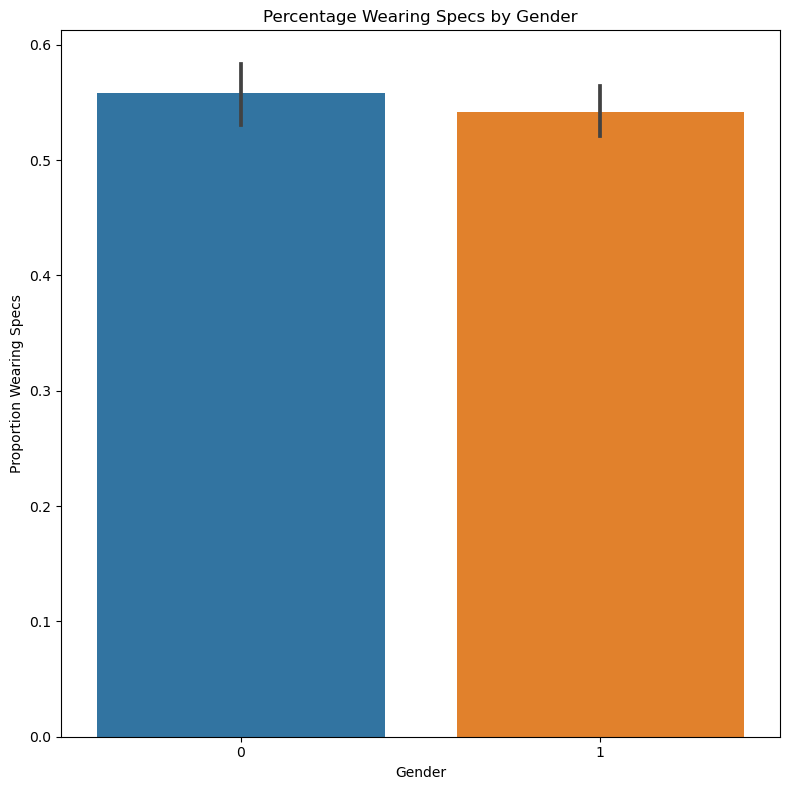

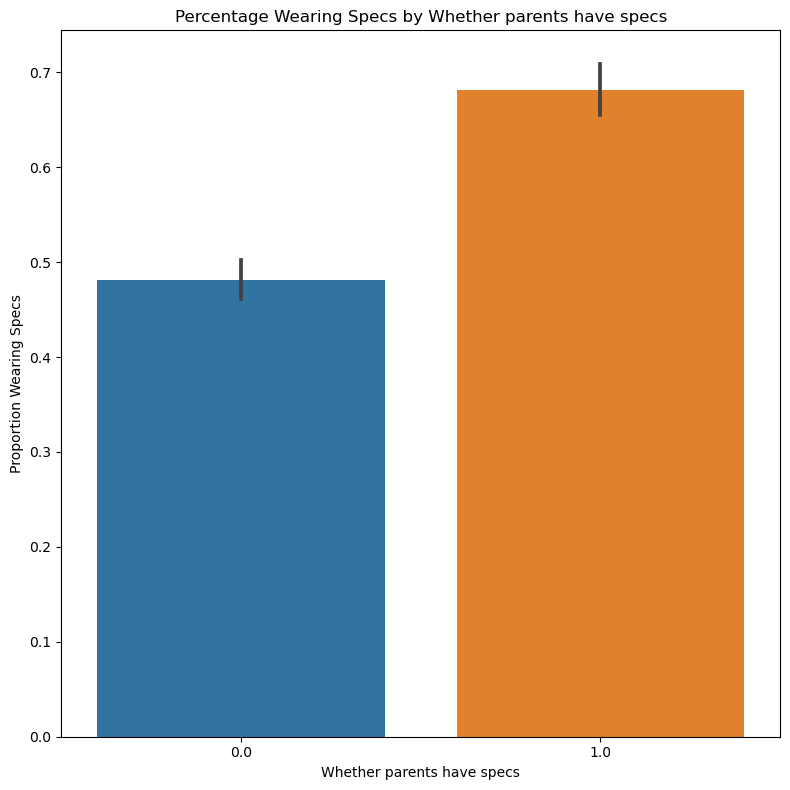

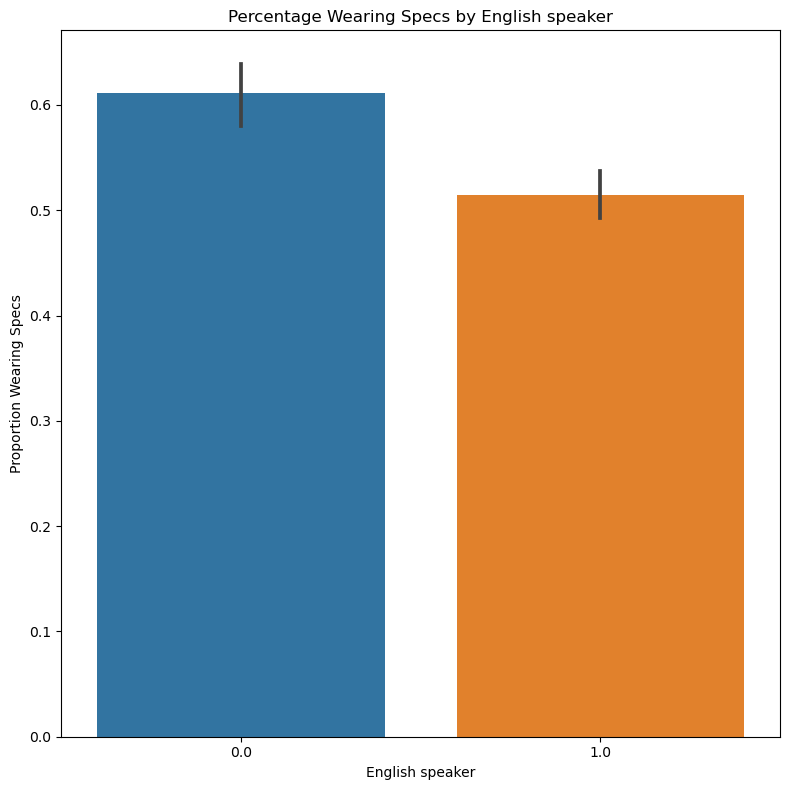

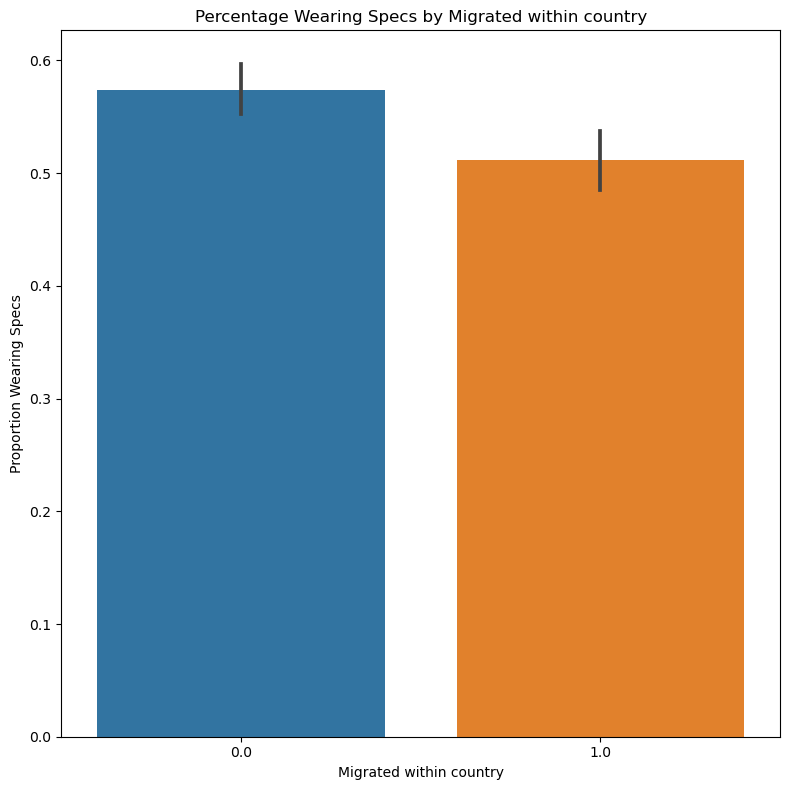

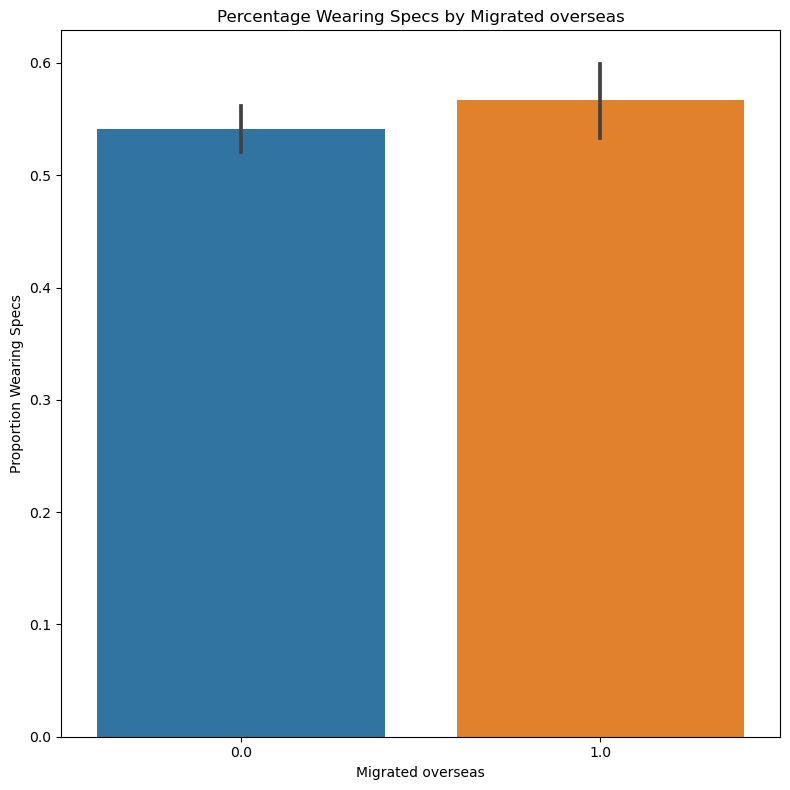

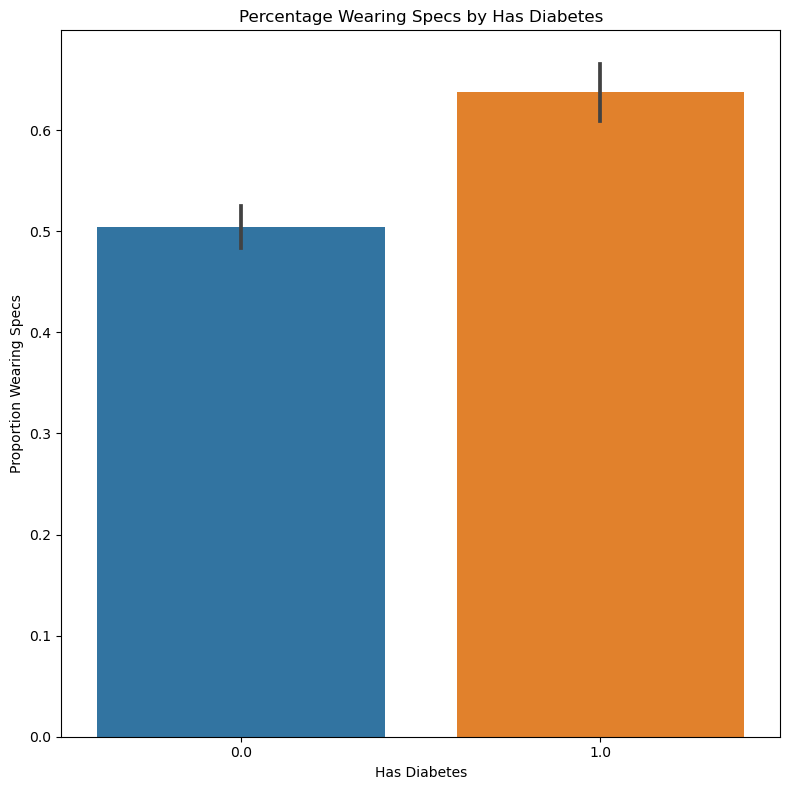

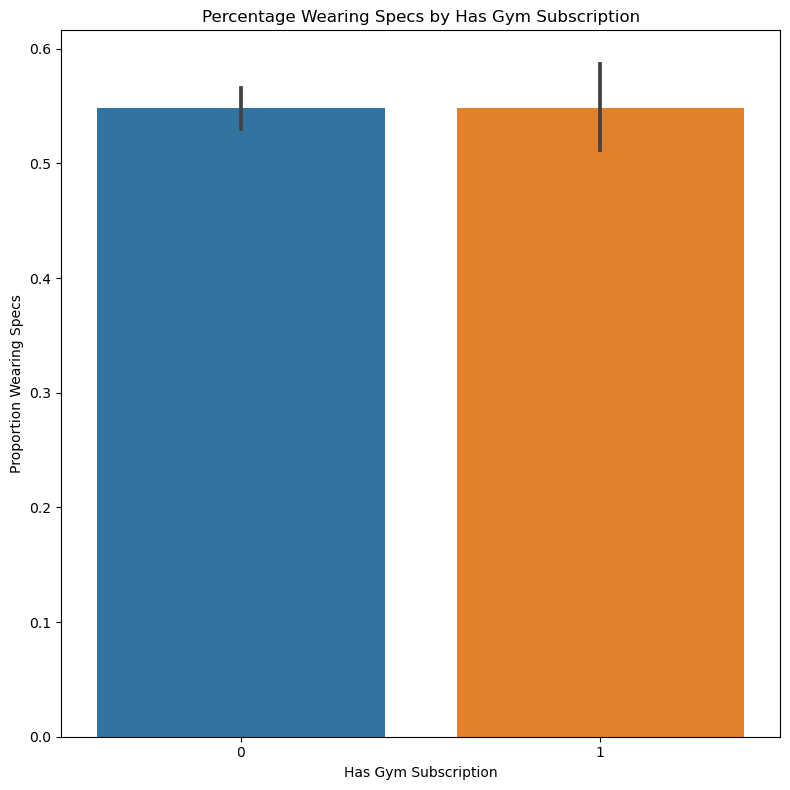

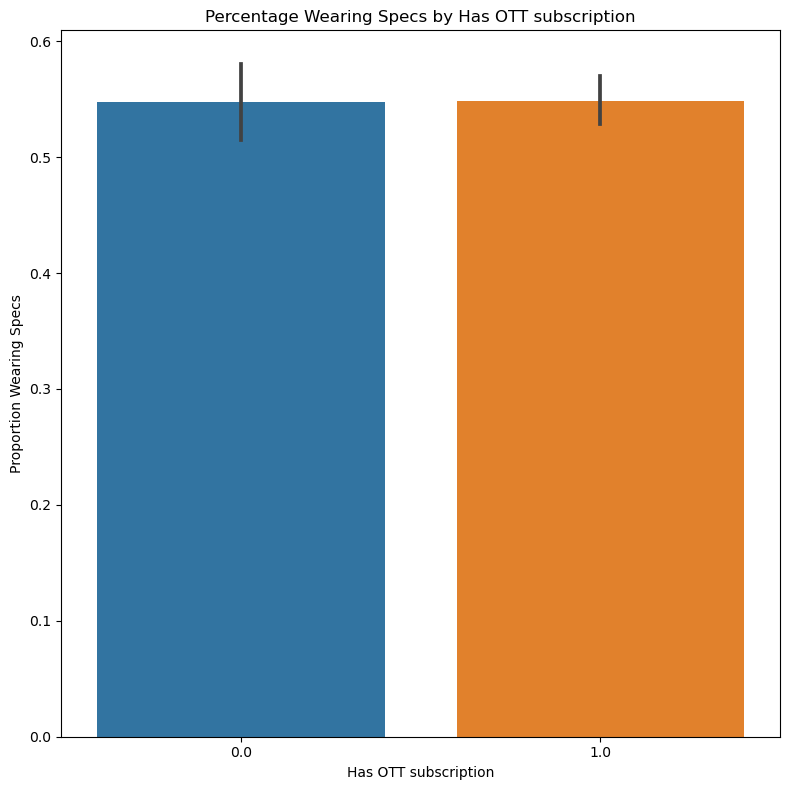

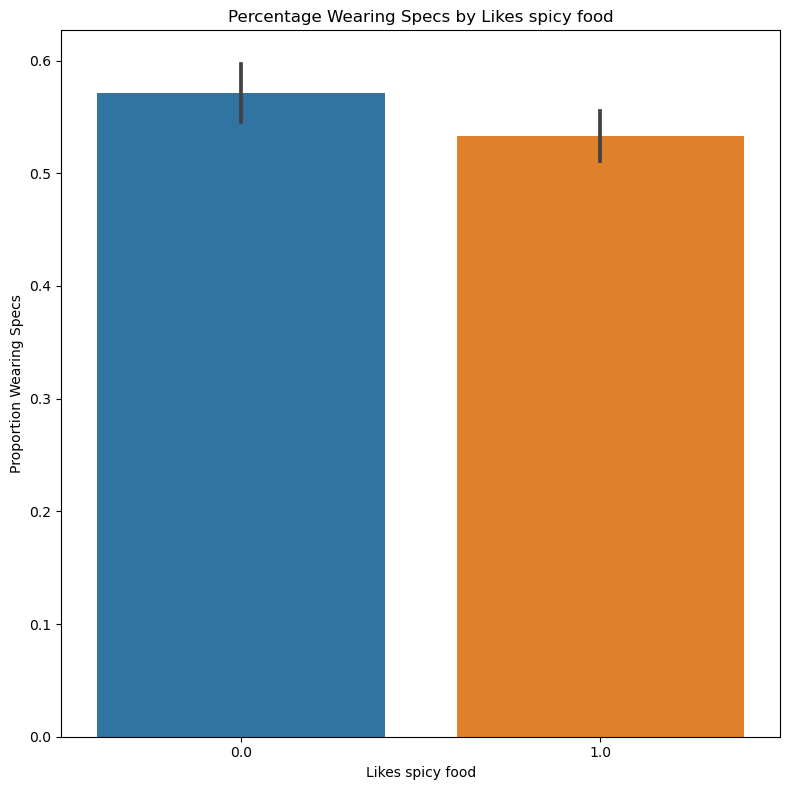

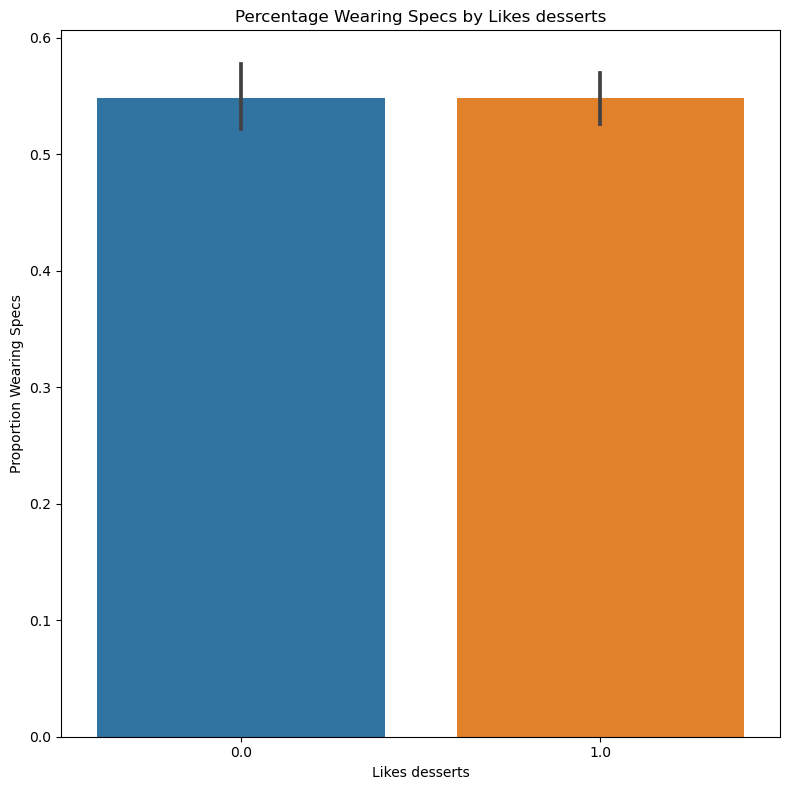

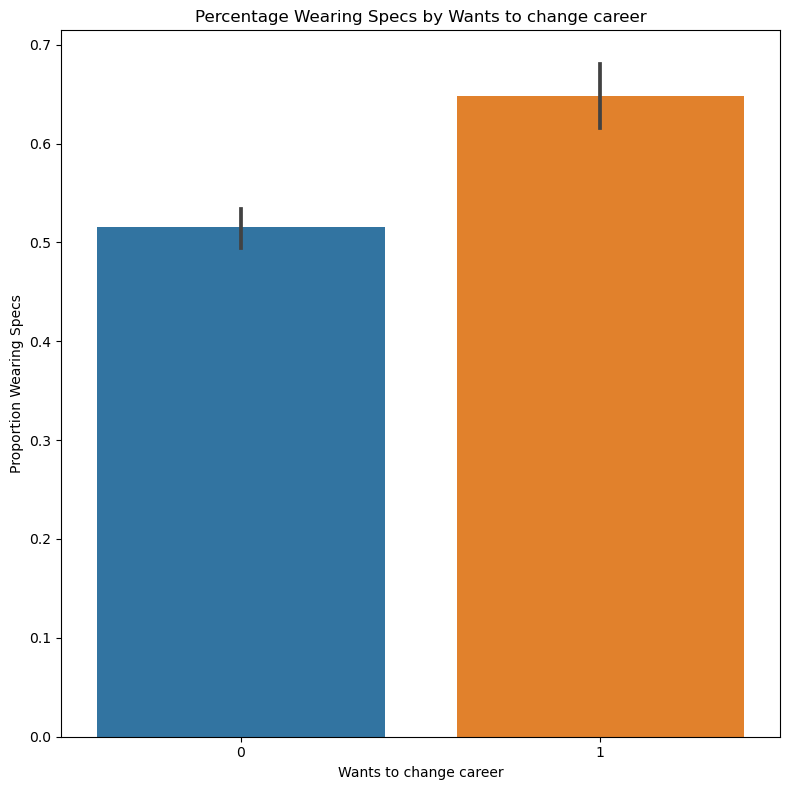

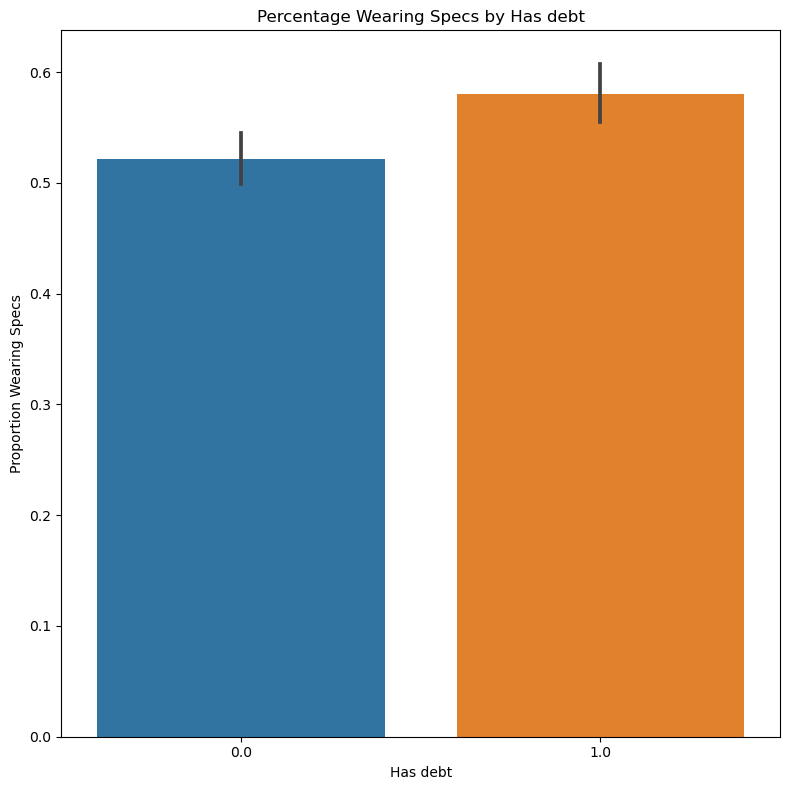

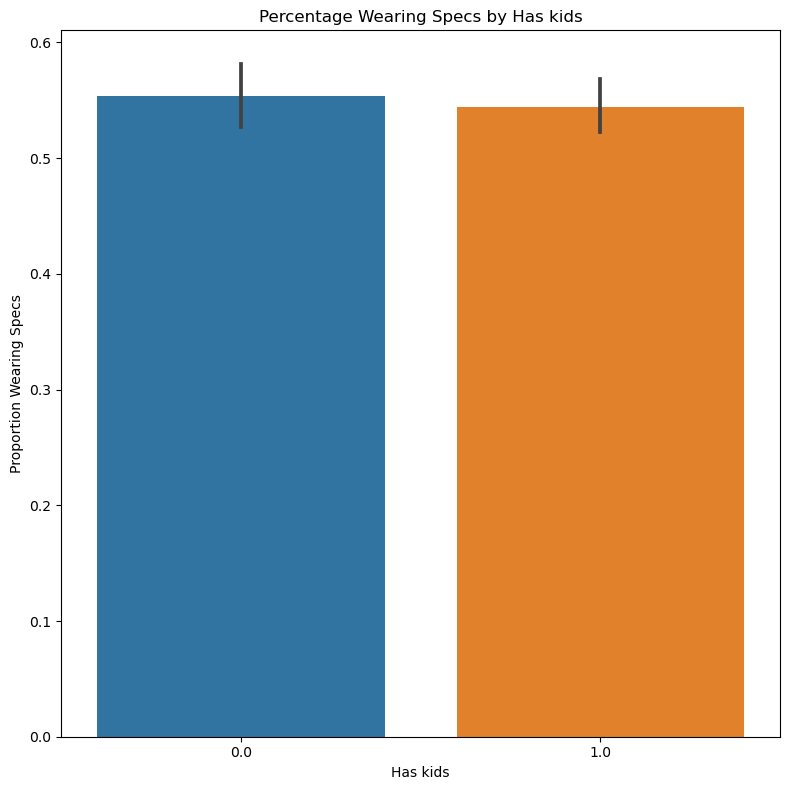

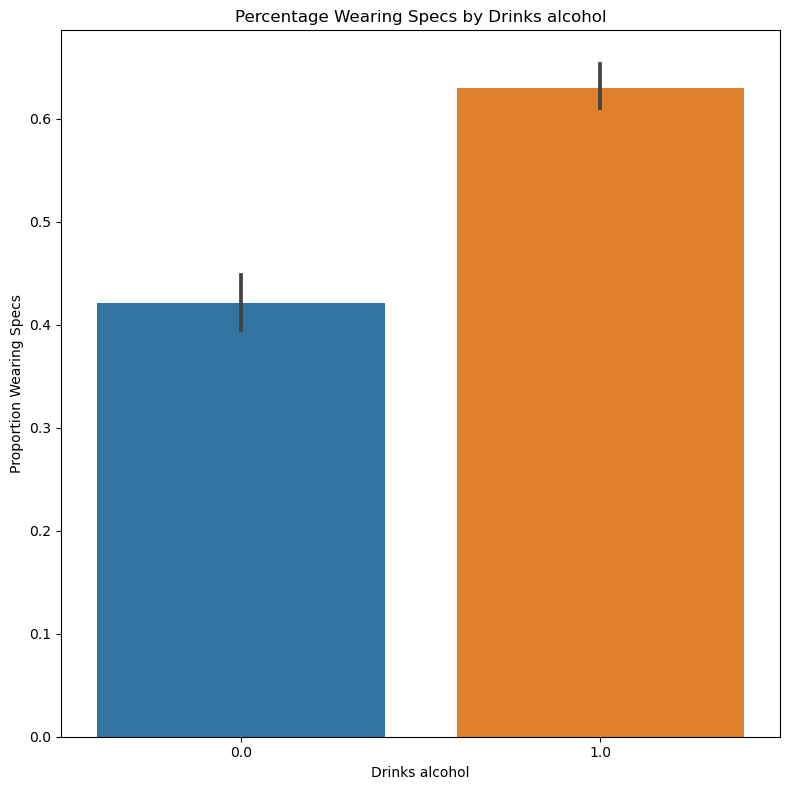

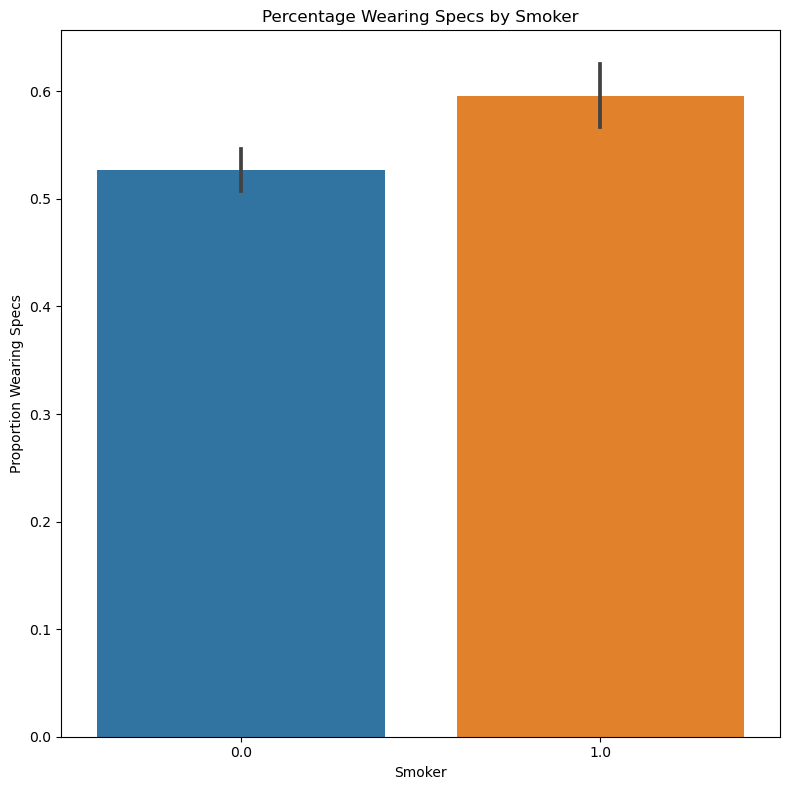

In [189]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col != "Wear Specs"]

for col in binary_cols:
    plt.figure(figsize=(8, 8))
    sns.barplot(data=df, x=col, y="Wear Specs")
    plt.title(f'Percentage Wearing Specs by {col}')
    plt.ylabel('Proportion Wearing Specs')
    plt.tight_layout()
    plt.show()


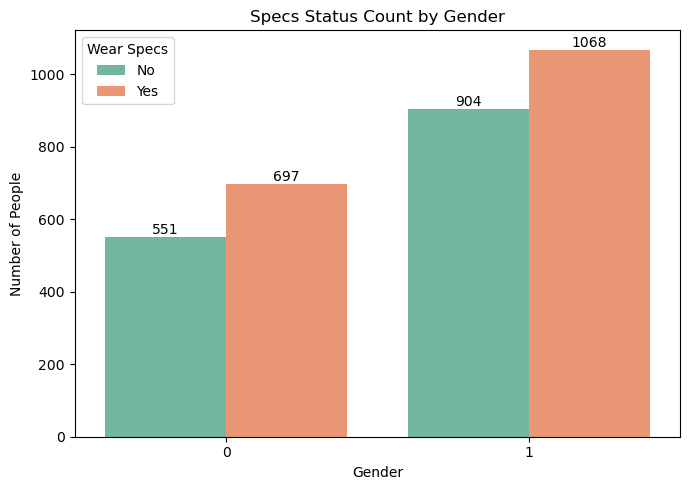

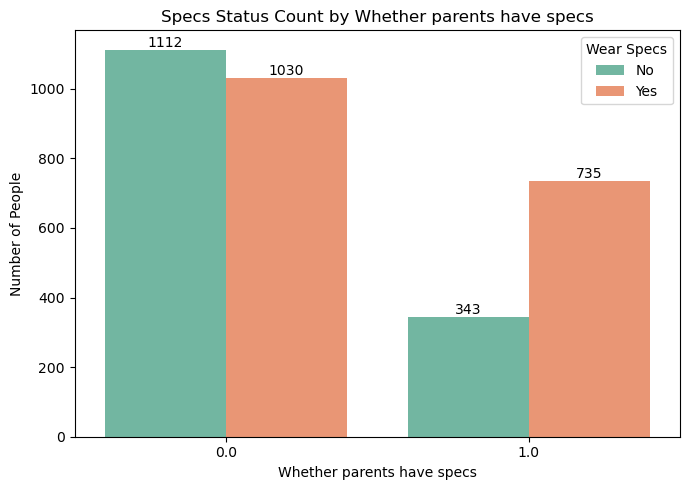

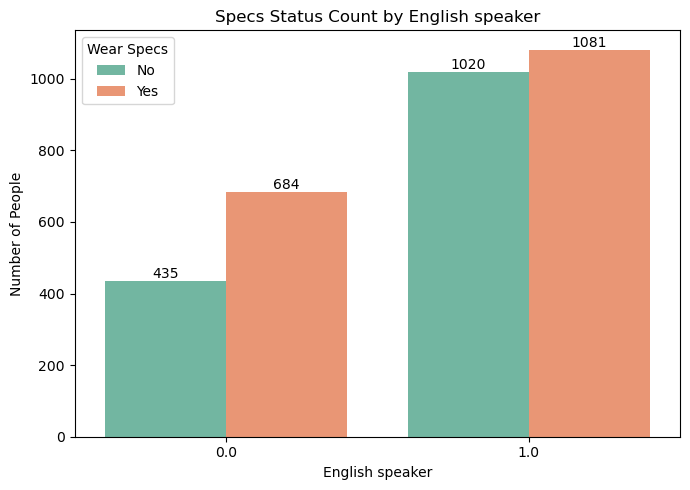

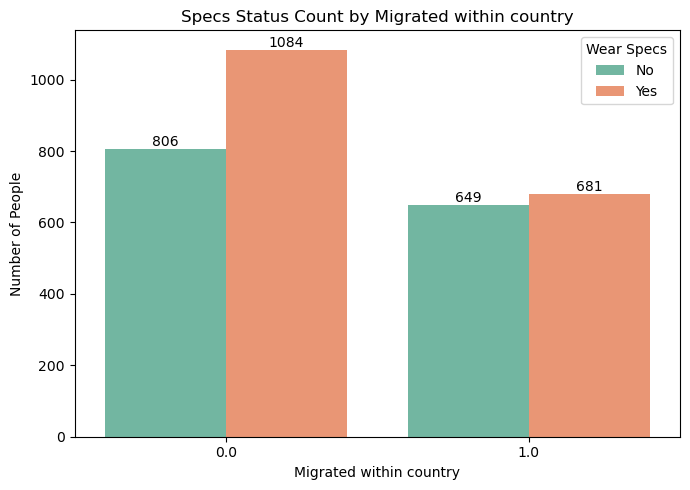

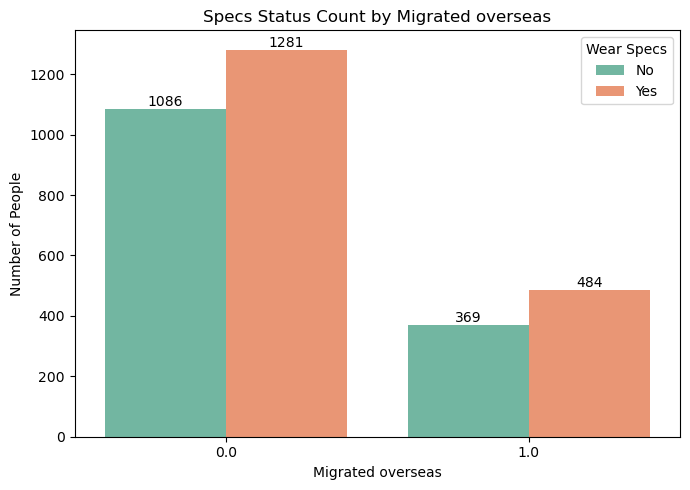

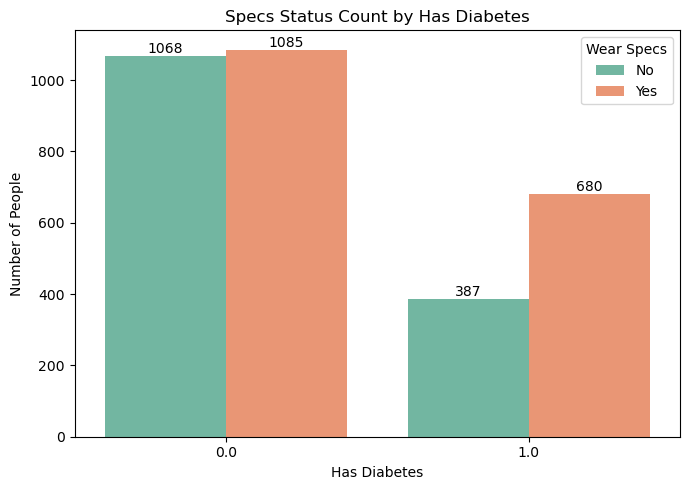

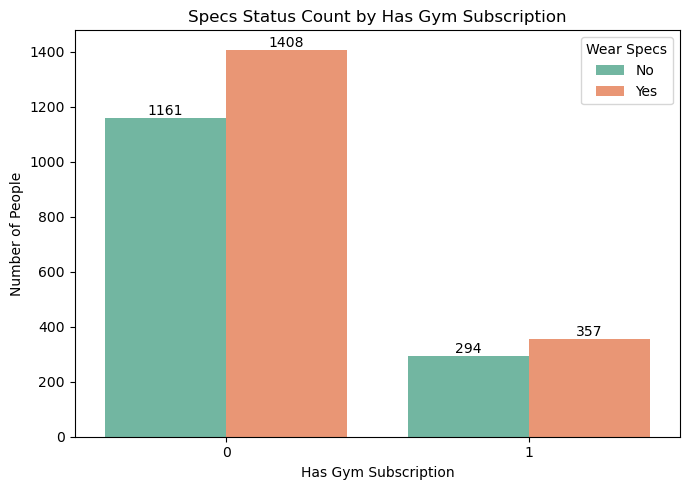

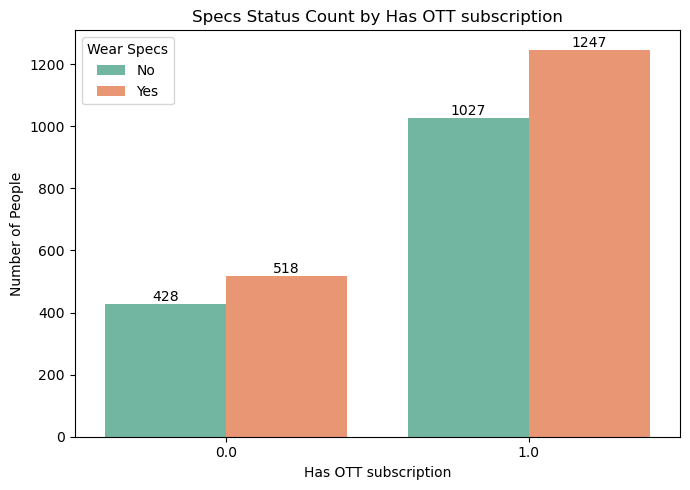

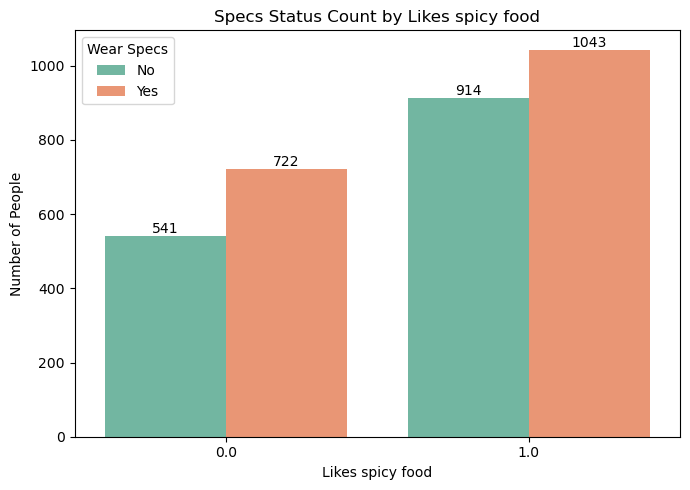

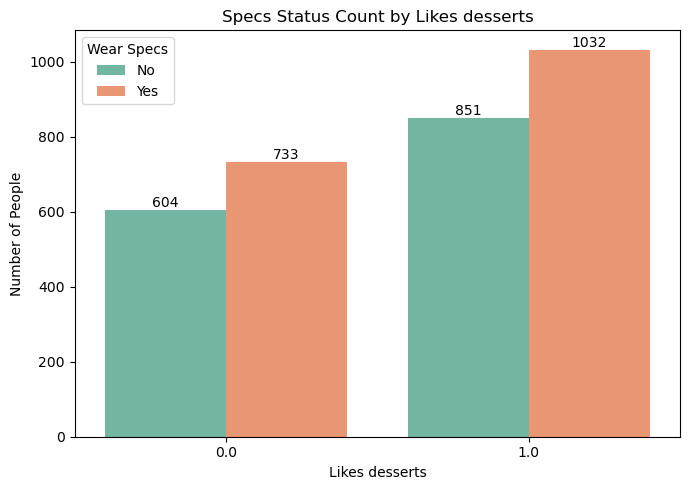

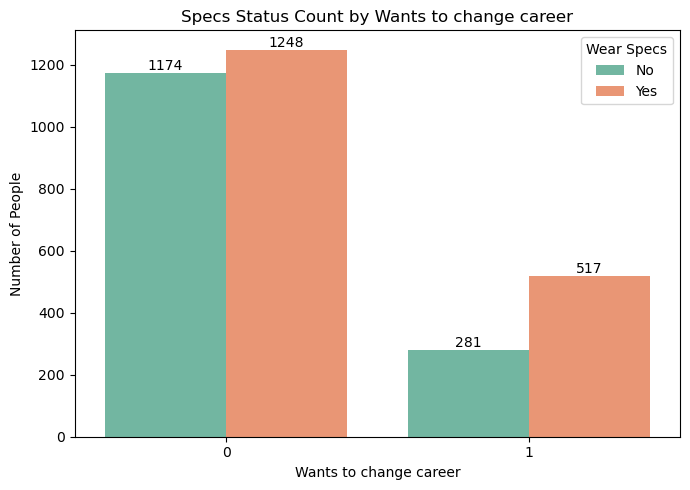

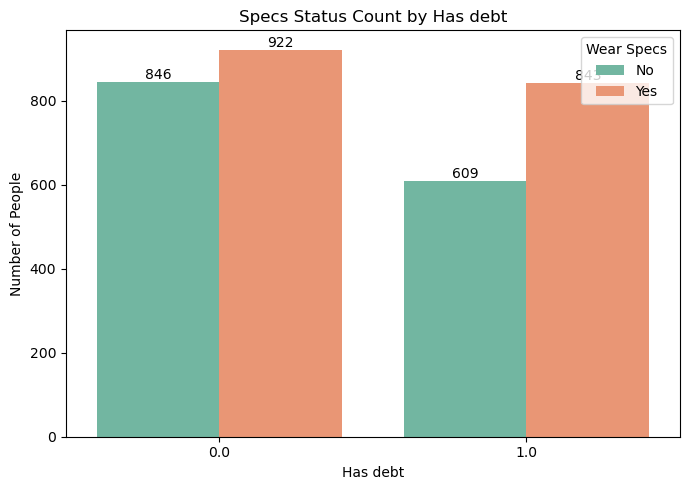

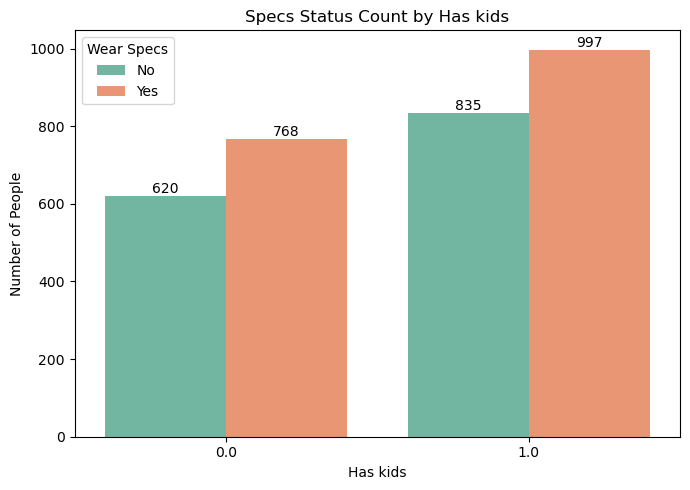

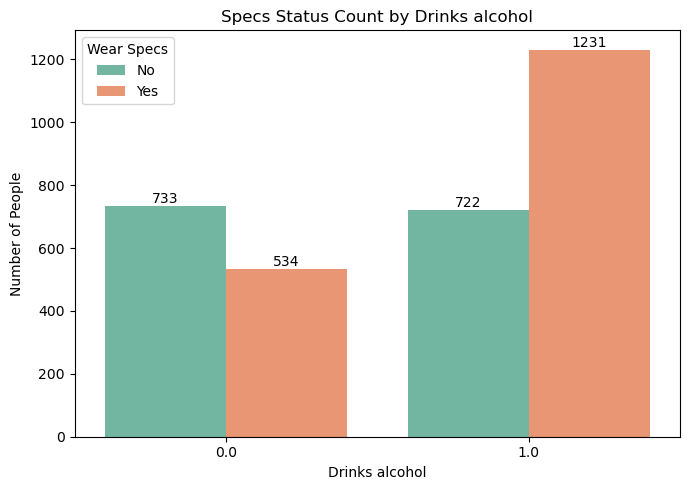

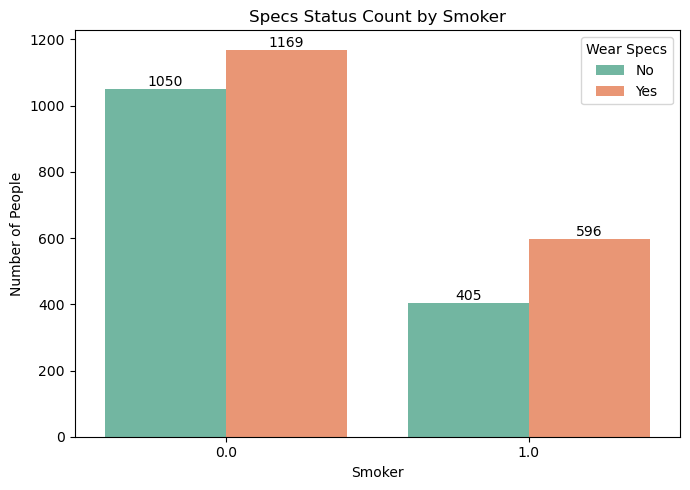

In [88]:

for col in binary_cols:
    plt.figure(figsize=(7, 5))
    
    
    data_grouped = df.groupby([col, 'Wear Specs']).size().reset_index(name='count')
    data_grouped['Wear Specs'] = data_grouped['Wear Specs'].map({1: 'Yes', 0: 'No'})
    
    sns.barplot(data=data_grouped, x=col, y='count', hue='Wear Specs', palette='Set2')

    
    for container in plt.gca().containers:
        plt.bar_label(container, label_type='edge')

    plt.title(f'Specs Status Count by {col}')
    plt.ylabel('Number of People')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [91]:
specs_and_alcohol = df[(df['Wear Specs'] == 1) & (df['Drinks alcohol'] == 1)]
specs_and_no_alcohol = df[(df['Wear Specs'] == 1) & (df['Drinks alcohol'] == 0)]

print(f"Number of people who drink alcohol and wear specs: {len(specs_and_alcohol)}")
print(f"Number of people who dont drink alcohol and wear specs: {len(specs_and_no_alcohol)}")


Number of people who drink alcohol and wear specs: 1231
Number of people who dont drink alcohol and wear specs: 534


In [93]:
specs_and_smoke = df[(df['Wear Specs'] == 1) & (df['Smoker'] == 1)]
specs_and_no_smoke= df[(df['Wear Specs'] == 0) & (df['Smoker'] == 1)]

print(f"Number of people who smoke and wear specs: {len(specs_and_smoke)}")
print(f"Number of people who smoke and doesn't wear specs: {len(specs_and_no_smoke)}")


Number of people who smoke and wear specs: 596
Number of people who smoke and doesn't wear specs: 405


In [34]:
df.columns

Index(['Unique ID', 'Country', 'Age', 'Annual Family Income ($)', 'Gender',
       'Time spent watching videos/TV', 'Time spent playing indoor sports',
       'Time spent playing outdoor sports',
       'Total Time spent working in front of screen', 'Sleeping hours', 'IQ',
       'Whether parents have specs', 'English speaker',
       'Migrated within country', 'Migrated overseas',
       'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)',
       'Has Diabetes', 'Education Status', 'Has Gym Subscription',
       'Has OTT subscription', 'Number of friends', 'Likes spicy food',
       'Likes desserts', 'Wants to change career', 'Has debt', 'Has kids',
       'Drinks alcohol', 'Smoker', 'Wear Specs'],
      dtype='object')

In [97]:
watch_videos=df[(df['Time spent watching videos/TV']>4) &(df['Wear Specs']==1)]
print("Number of people who spent more than 4 hours watching videos/tv and wear specs:",len(watch_videos))

Number of people who spent more than 4 hours watching videos/tv and wear specs: 1025


In [98]:
watch_screen=df[(df['Total Time spent working in front of screen']>4) &(df['Wear Specs']==1)]
print("Number of people who spent more than 4 hours in front of screen and wear specs:",len(watch_screen))

Number of people who spent more than 4 hours in front of screen and wear specs: 1672


In [103]:
indoor=df[(df['Time spent playing indoor sports']>4) &(df['Wear Specs']==1)]
print("Number of people who spent more than 4 hours playing indoor sports and wear specs:",len(indoor))

Number of people who spent more than 4 hours playing indoor sports and wear specs: 0


In [106]:
outdoor=df[(df['Time spent playing outdoor sports']>4) &(df['Wear Specs']==1)]
print("Number of people who spent more than 4 hours playing outdoor sports and wear specs:",len(outdoor))

Number of people who spent more than 4 hours playing outdoor sports and wear specs: 2


In [114]:
parents=df[(df['Whether parents have specs']==1) &(df['Wear Specs']==1)]
no_parents=df[(df['Whether parents have specs']==1) &(df['Wear Specs']==0)]
print("Number of people whose parents have specs and they too wear specs:",len(parents))
print("Number of people whose parents have specs but they dont wear specs:",len(no_parents))

Number of people whose parents have specs and they too wear specs: 735
Number of people whose parents have specs but they dont wear specs: 343


In [120]:
Gym=df[(df['Has Gym Subscription']==1) &(df['Wear Specs']==1)]
no_Gym=df[(df['Has Gym Subscription']==0) &(df['Wear Specs']==1)]
print("Number of people who Have Gym Subscription and  wear specs:",len(Gym))
print("Number of people who doesn't Have Gym Subscription but wear specs:",len(no_Gym))

Number of people who Have Gym Subscription and  wear specs: 357
Number of people who doesn't Have Gym Subscription but wear specs: 1408


In [143]:
sleep=df[(df['Sleeping hours']>8) &(df['Wear Specs']==1)]
less_sleep=df[(df['Sleeping hours']<8) &(df['Wear Specs']==1)]

print("Number of people who sleeps more than 8 hours and  wear specs:",len(sleep))
print("Number of people who sleeps less than 8 hours and  wear specs:",len(less_sleep))


Number of people who sleeps more than 8 hours and  wear specs: 553
Number of people who sleeps less than 8 hours and  wear specs: 880


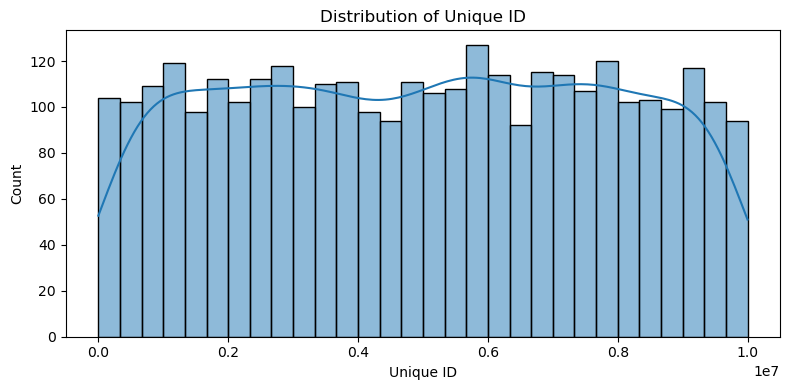

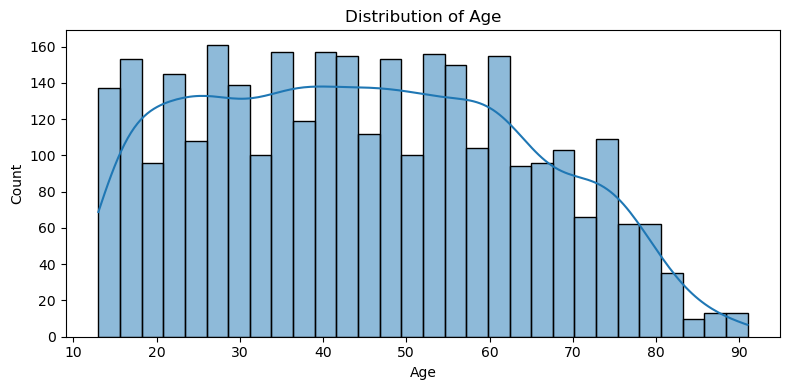

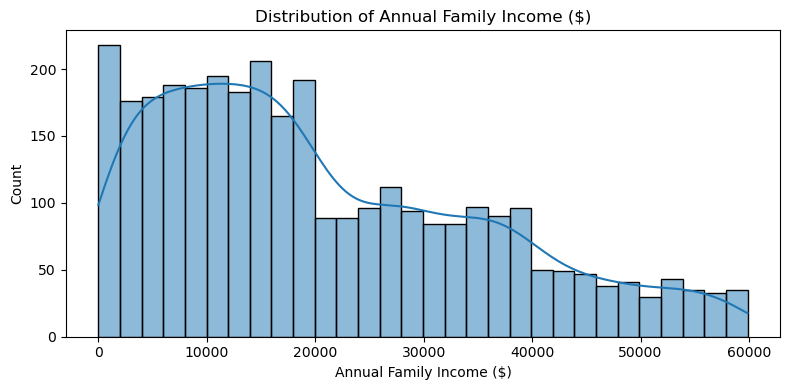

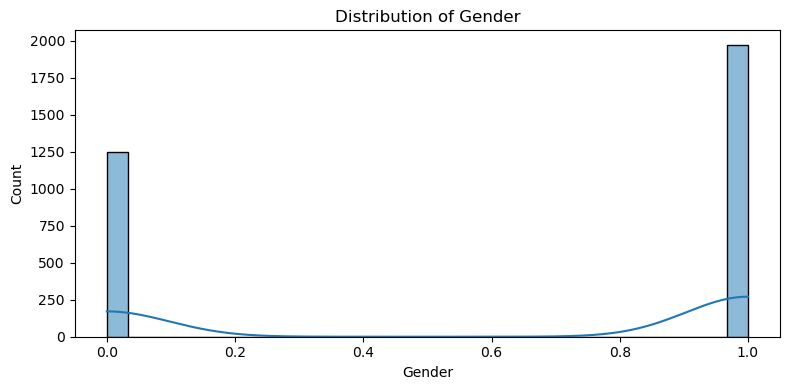

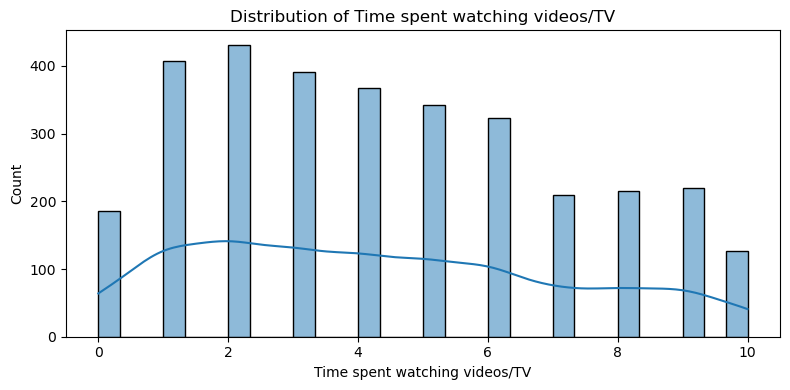

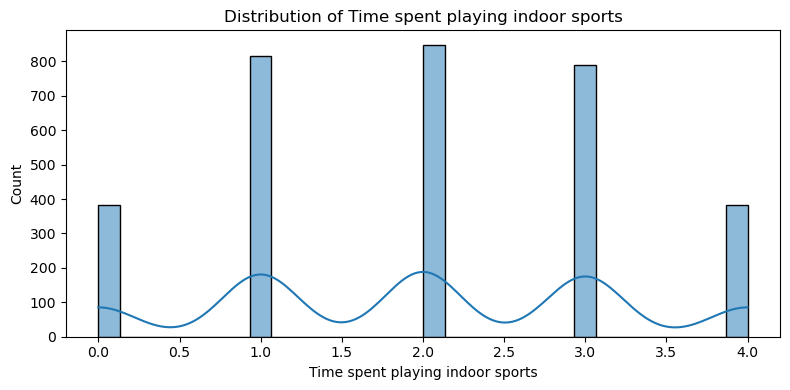

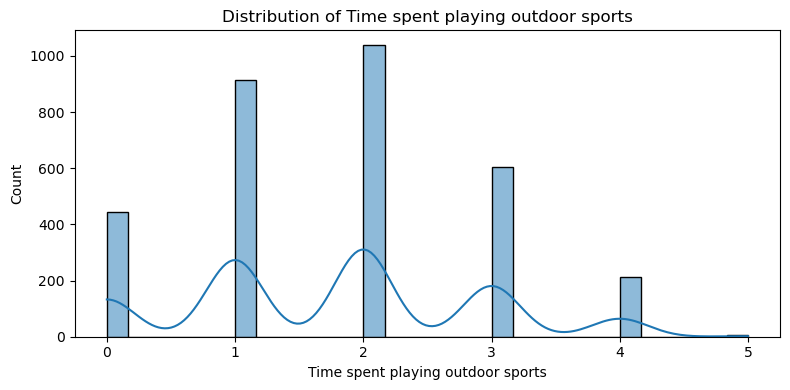

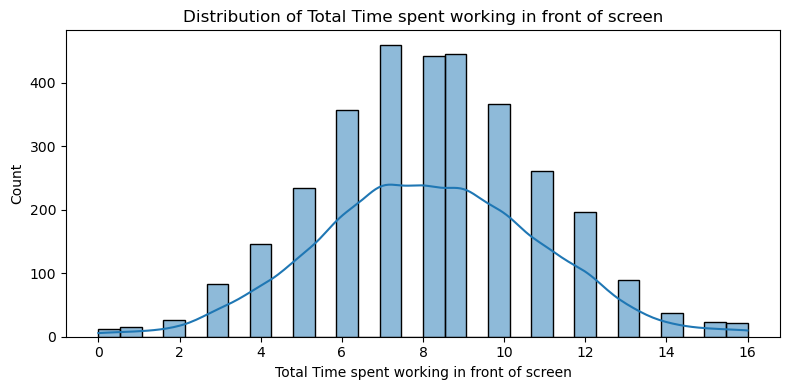

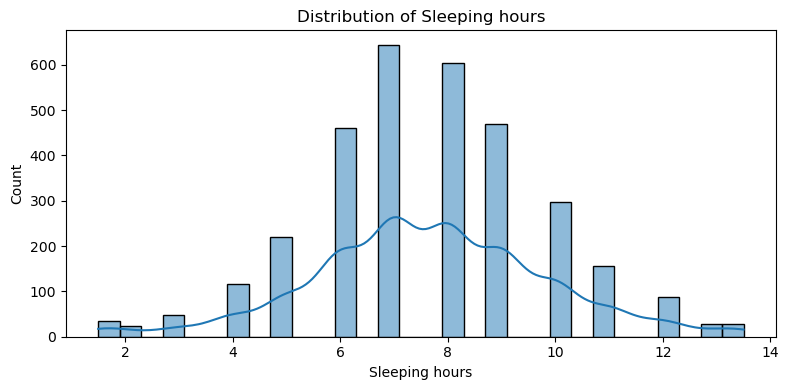

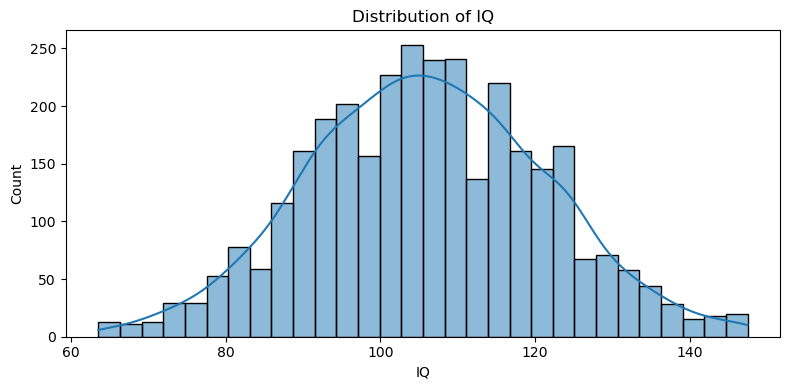

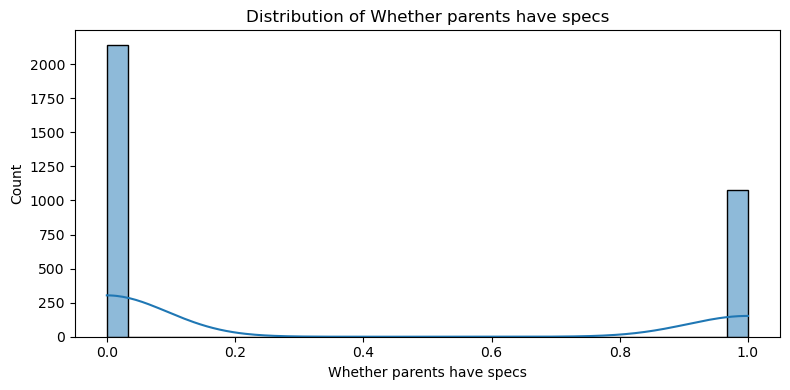

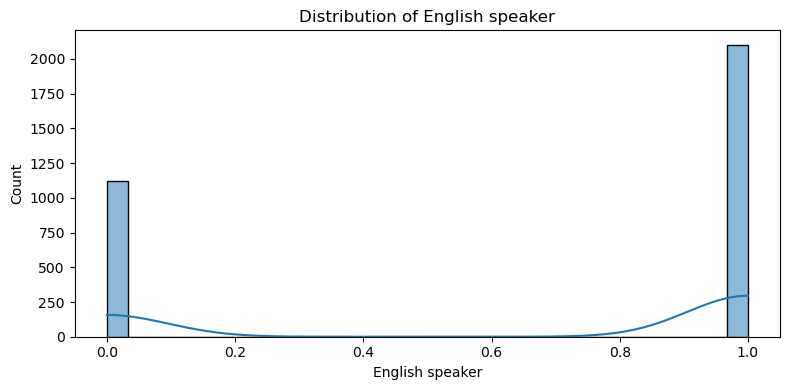

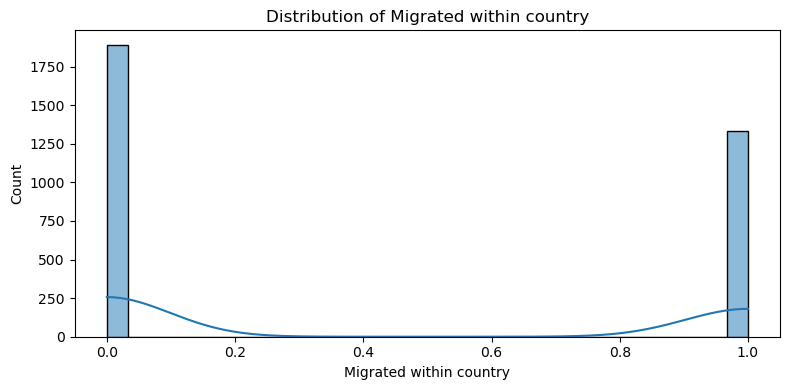

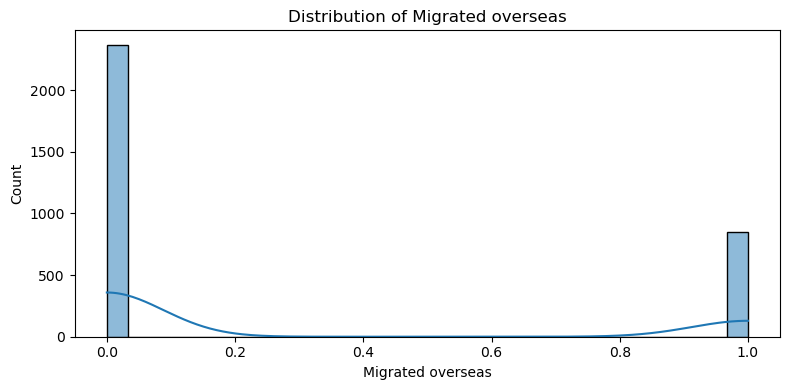

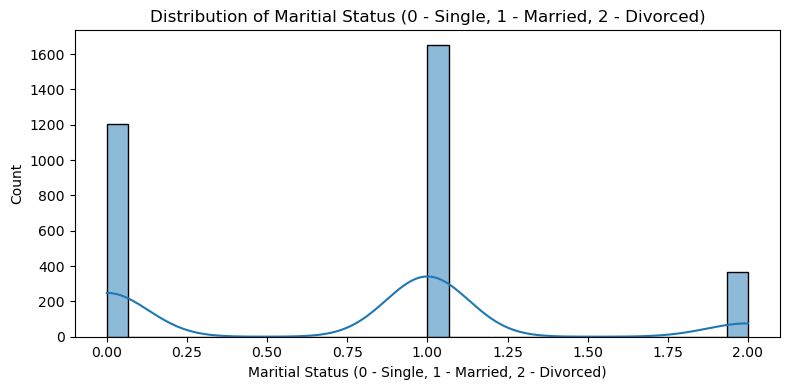

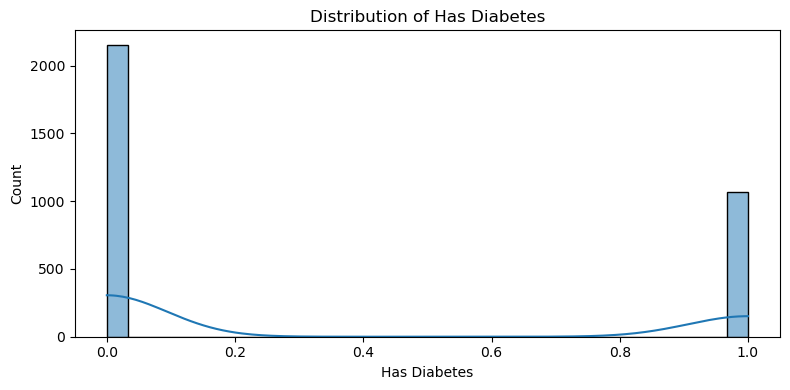

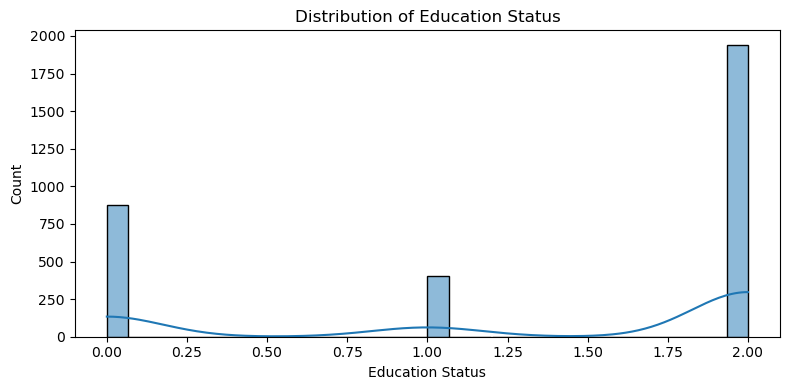

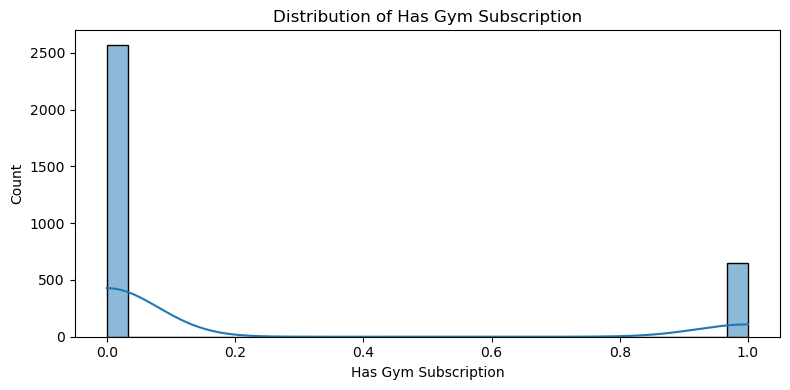

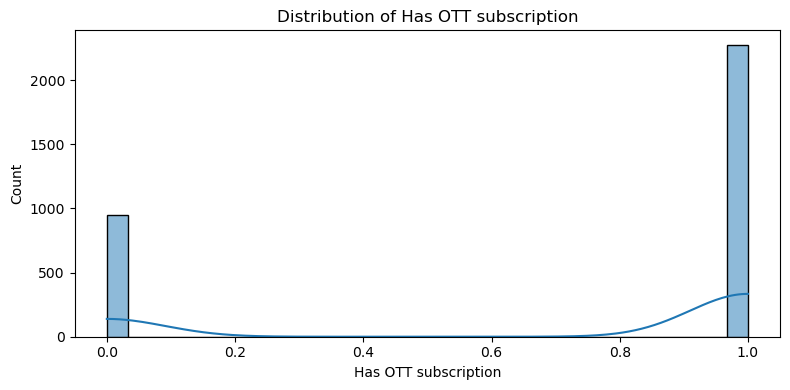

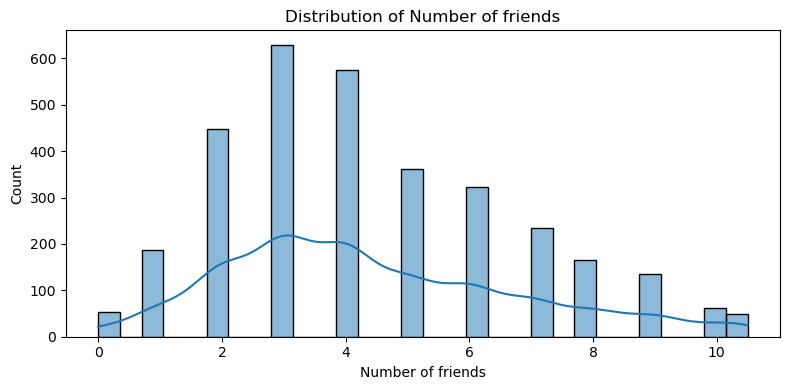

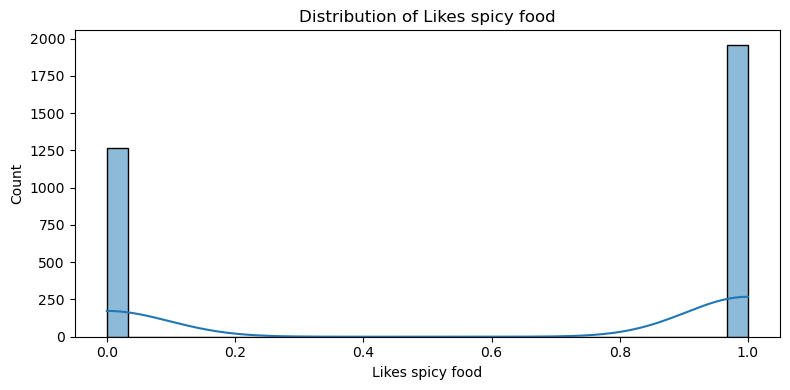

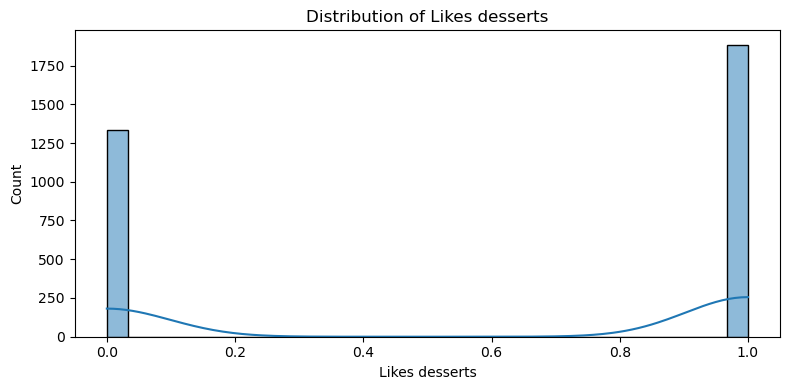

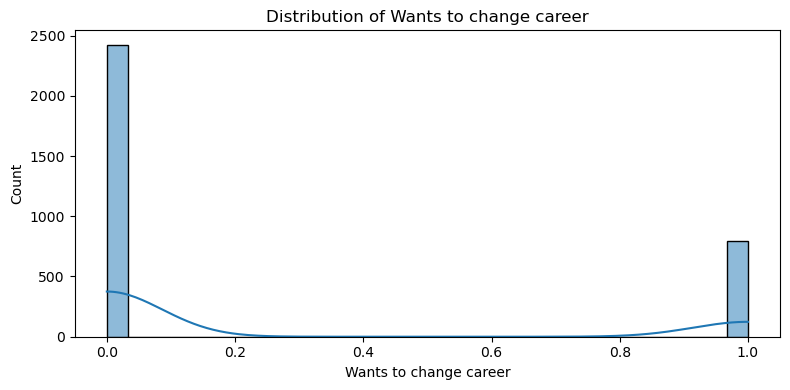

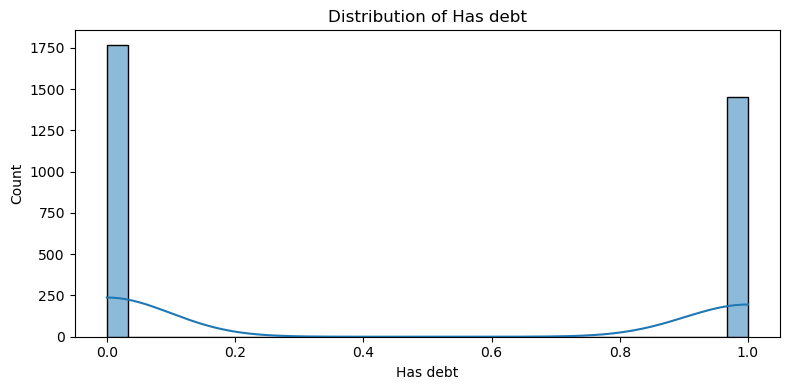

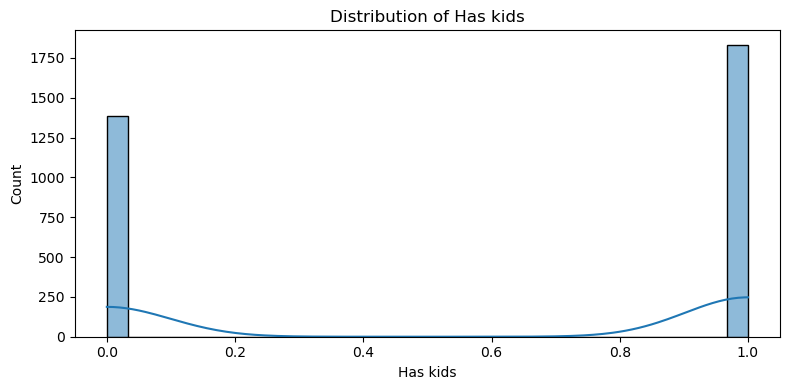

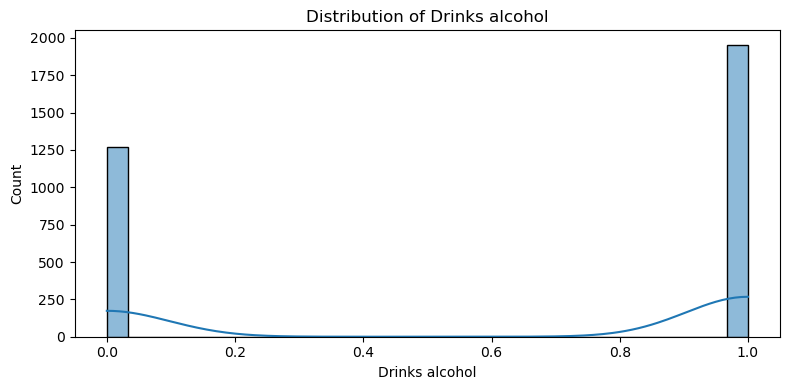

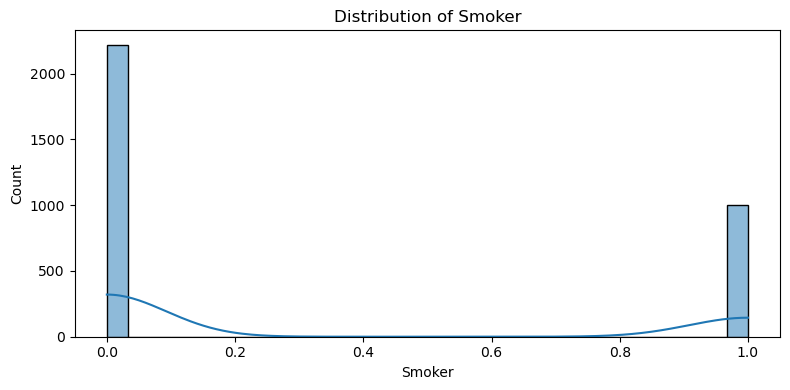

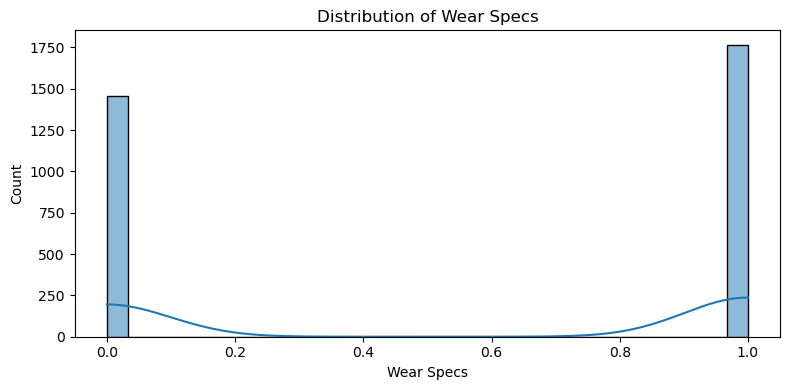

In [144]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

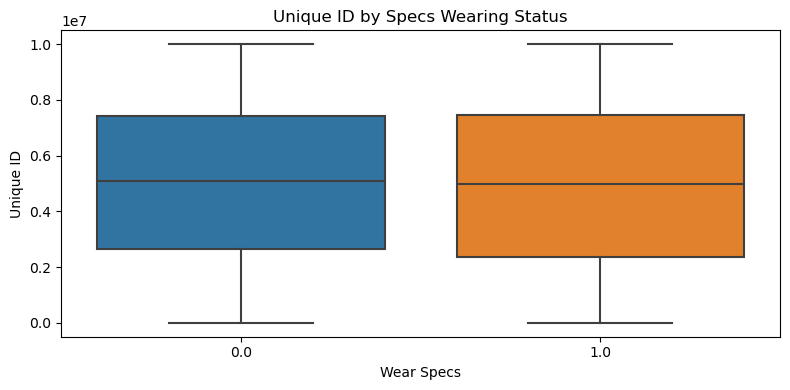

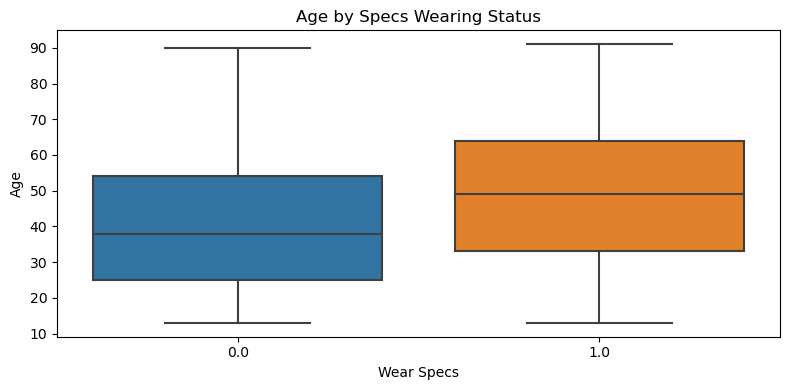

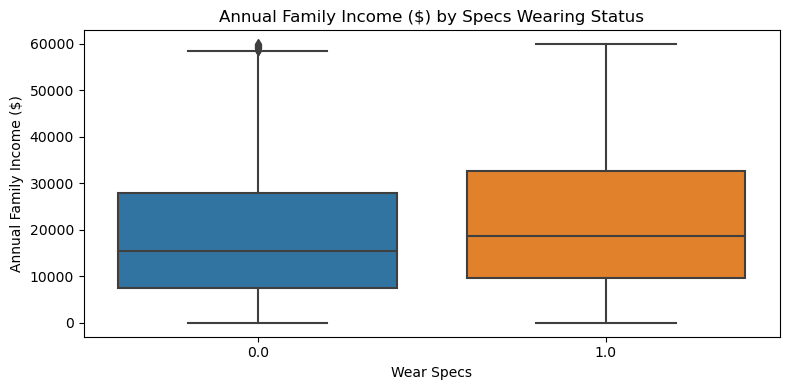

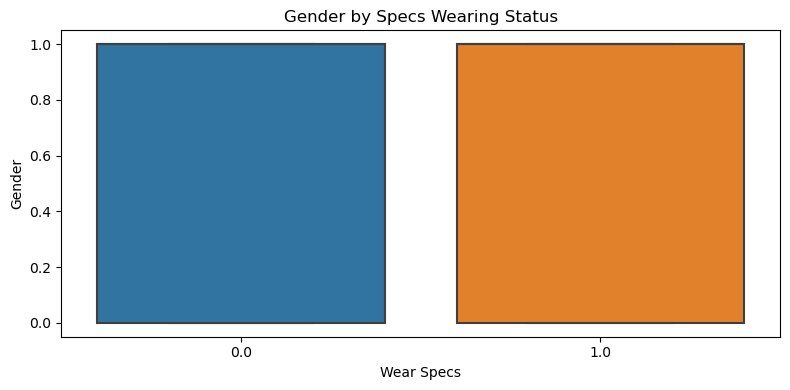

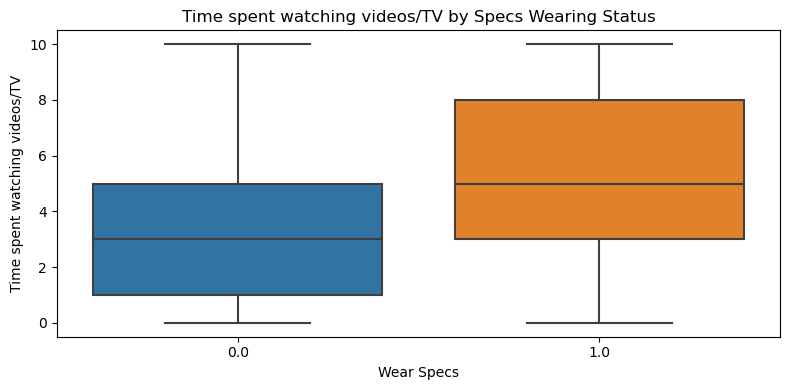

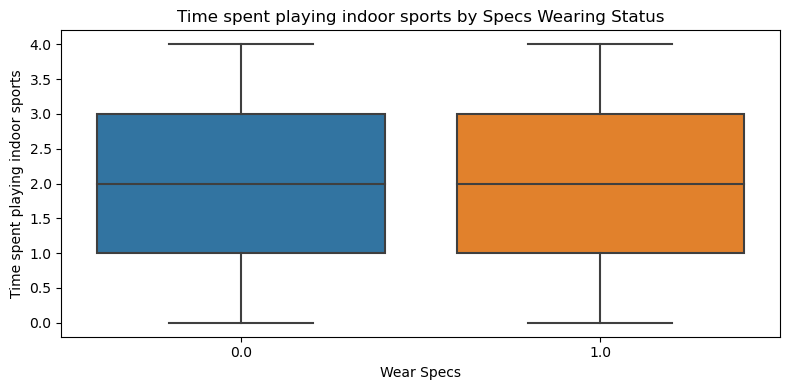

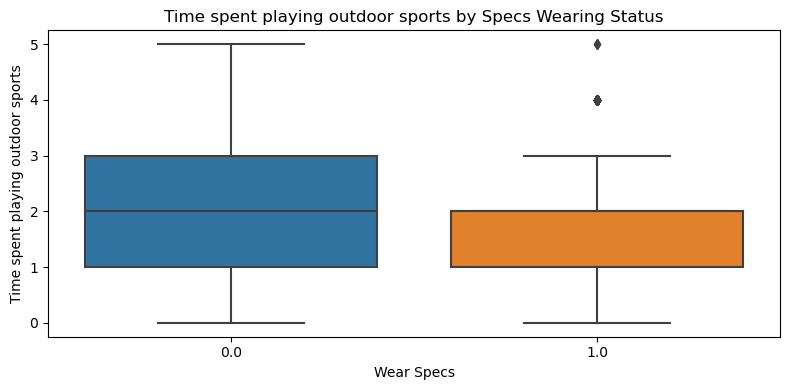

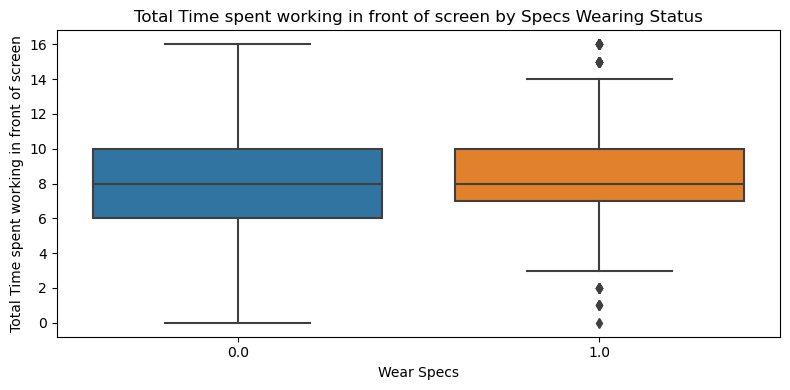

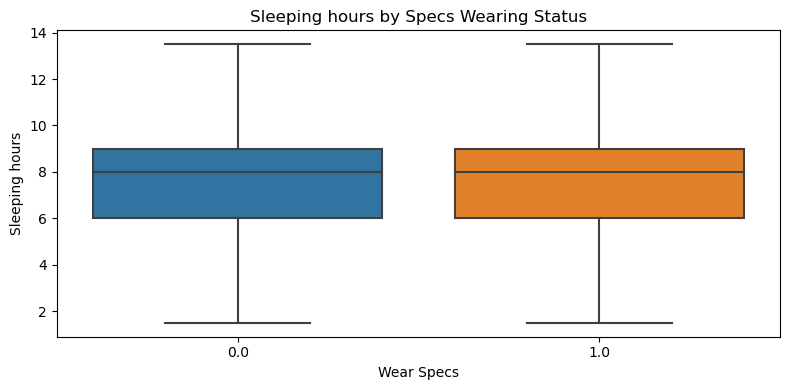

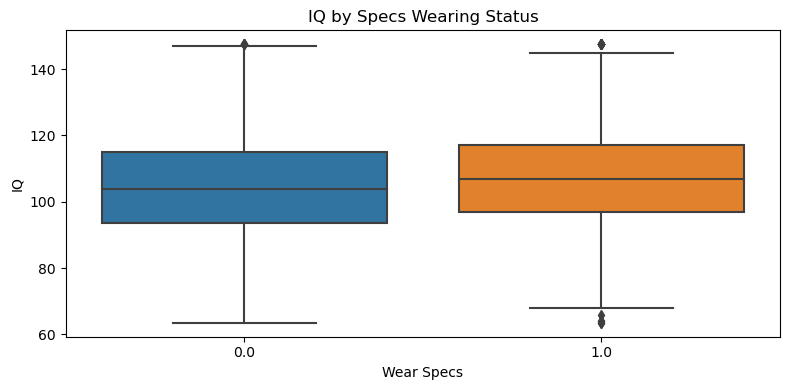

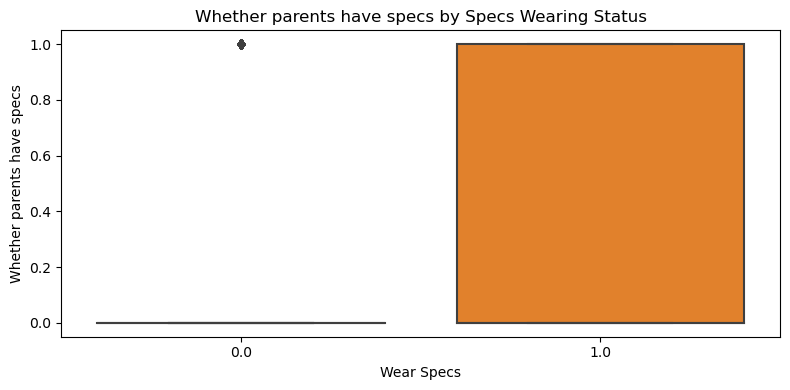

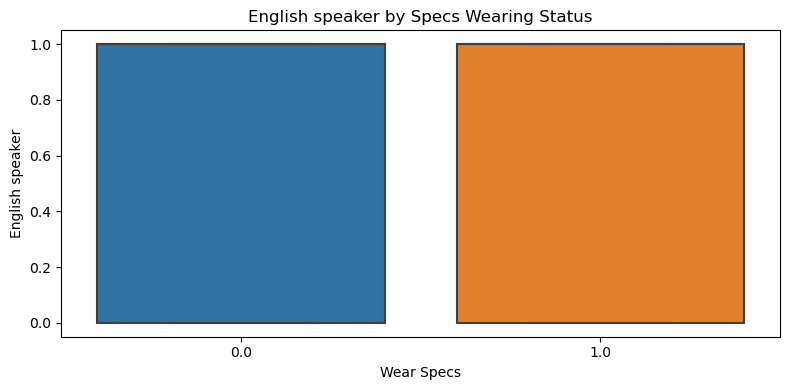

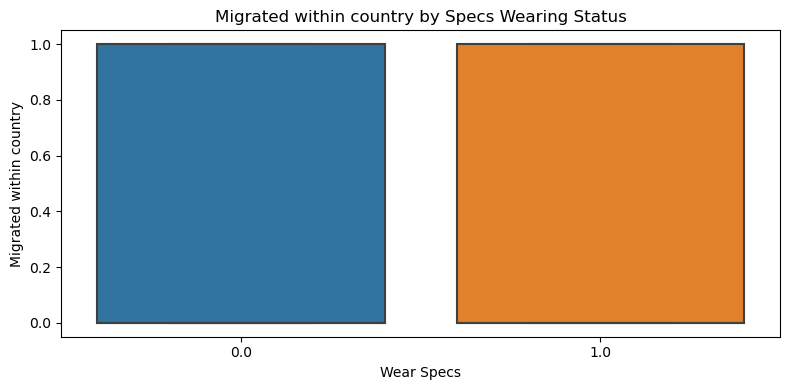

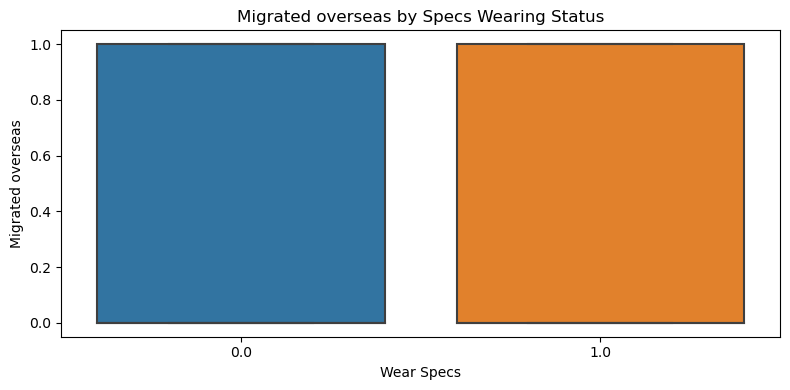

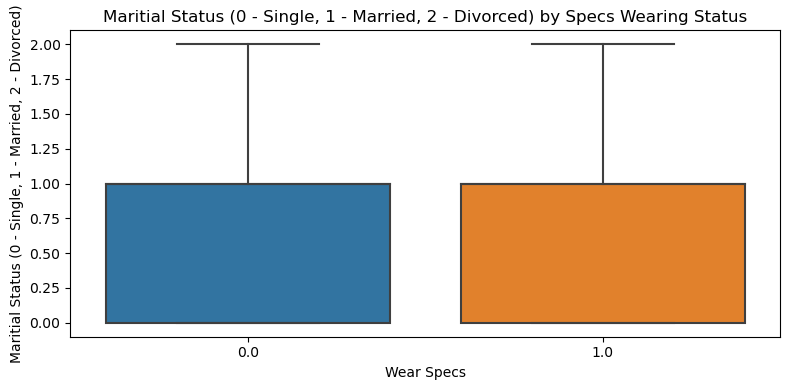

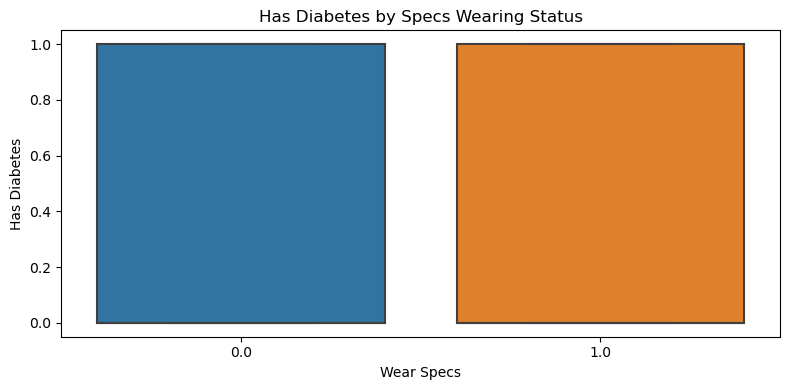

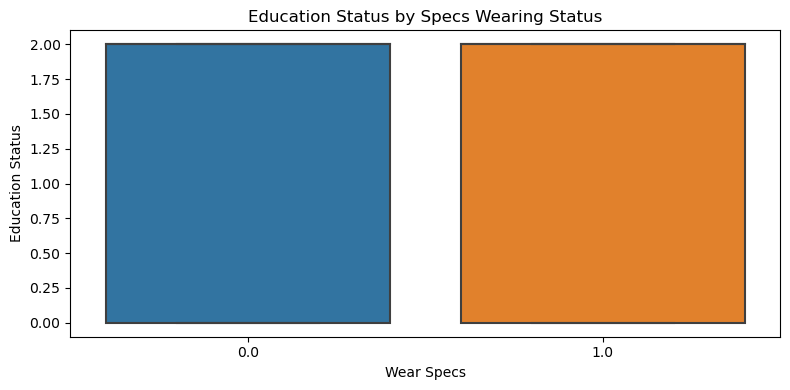

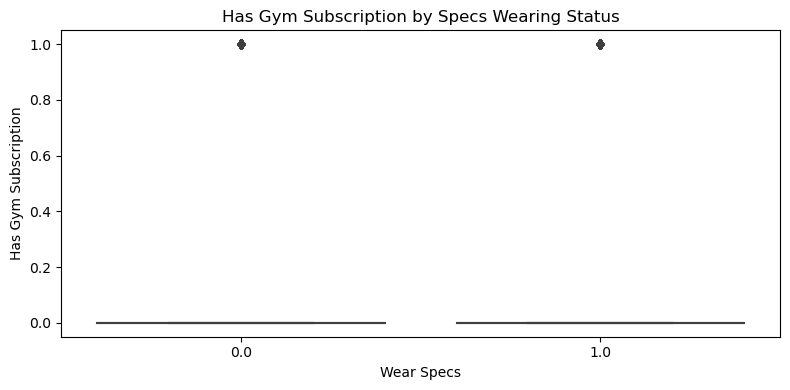

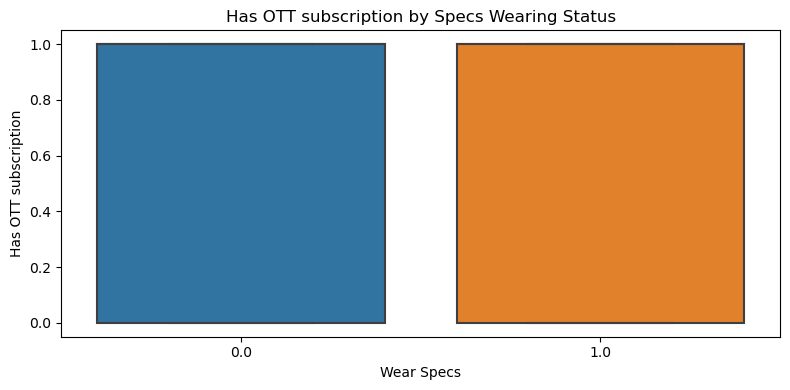

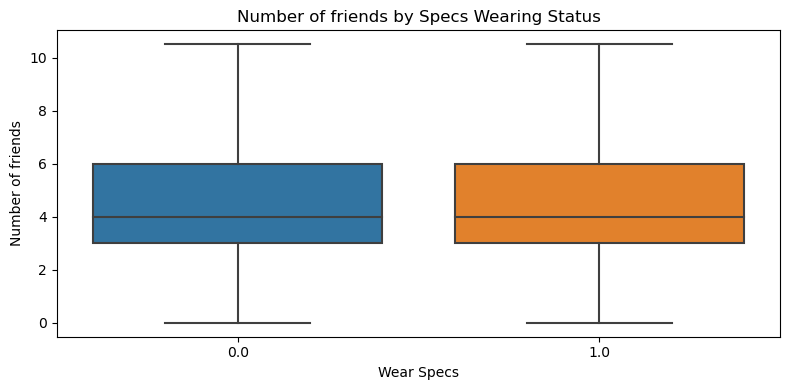

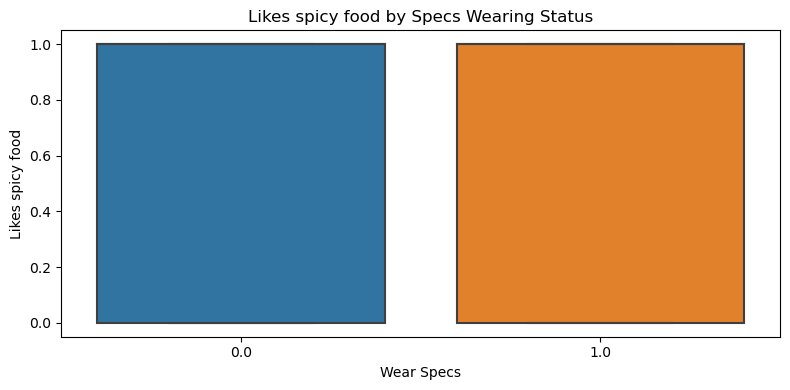

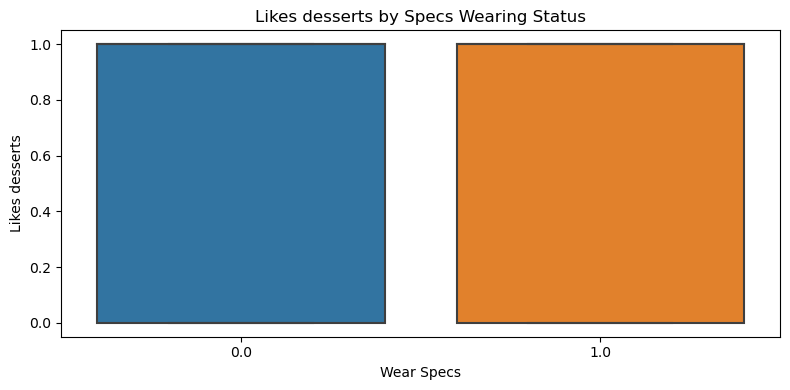

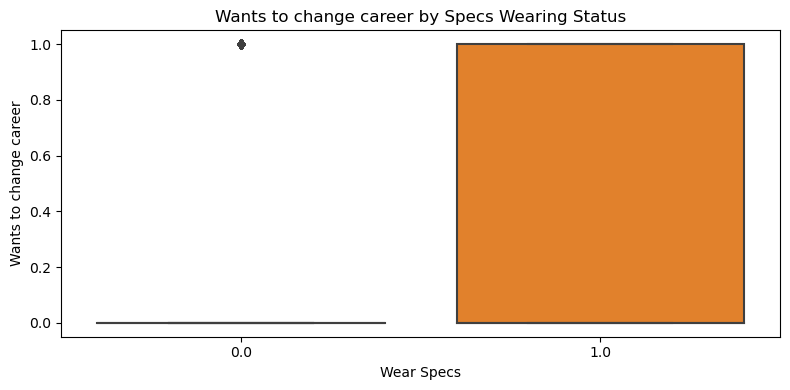

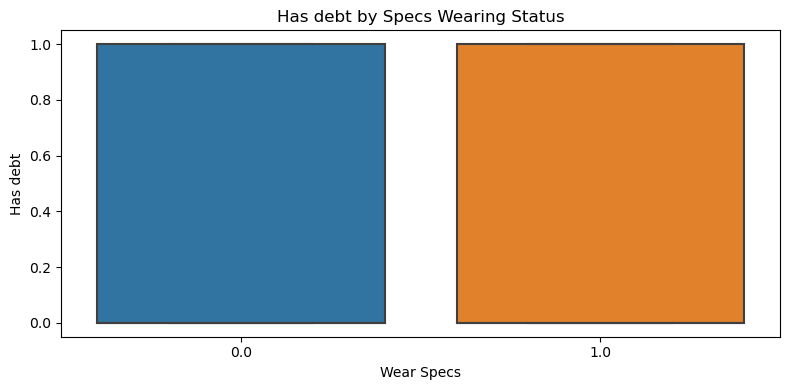

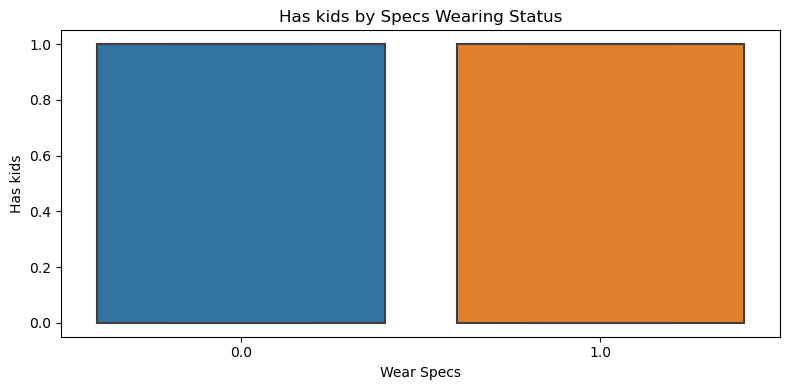

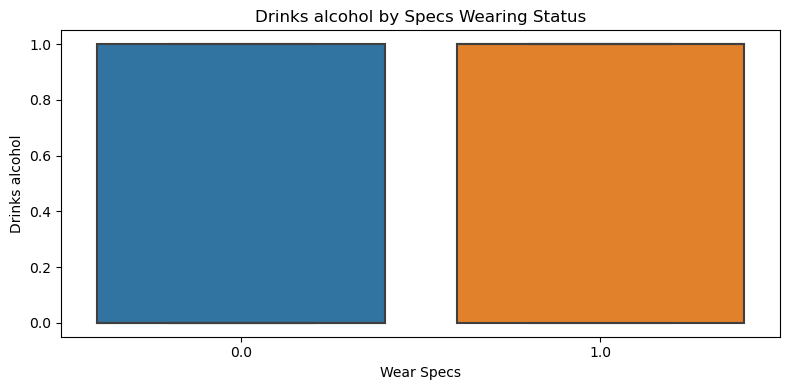

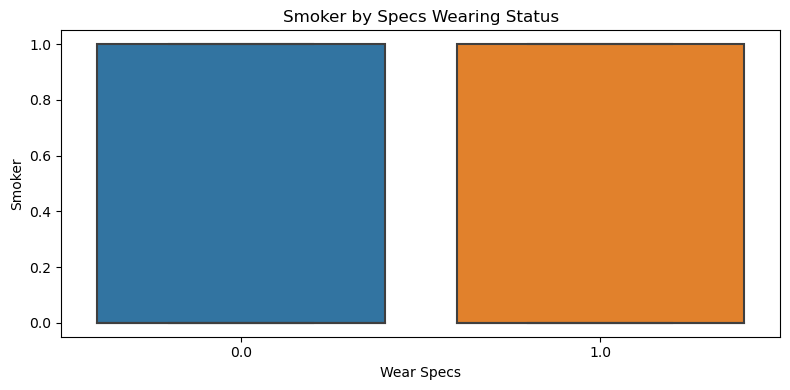

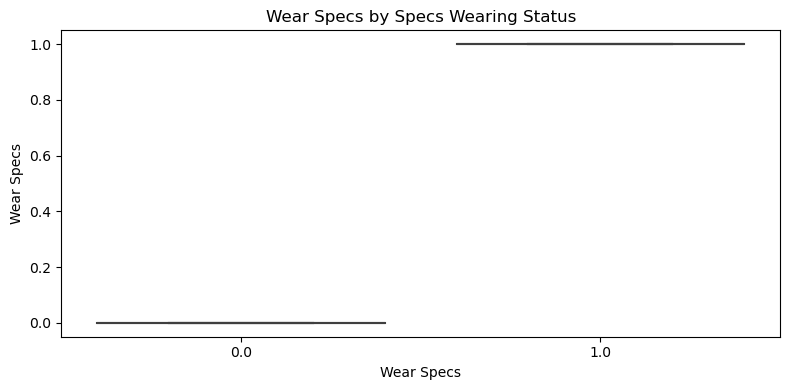

In [150]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="Wear Specs", y=col)
    plt.title(f'{col} by Specs Wearing Status')
    plt.tight_layout()
    plt.show()


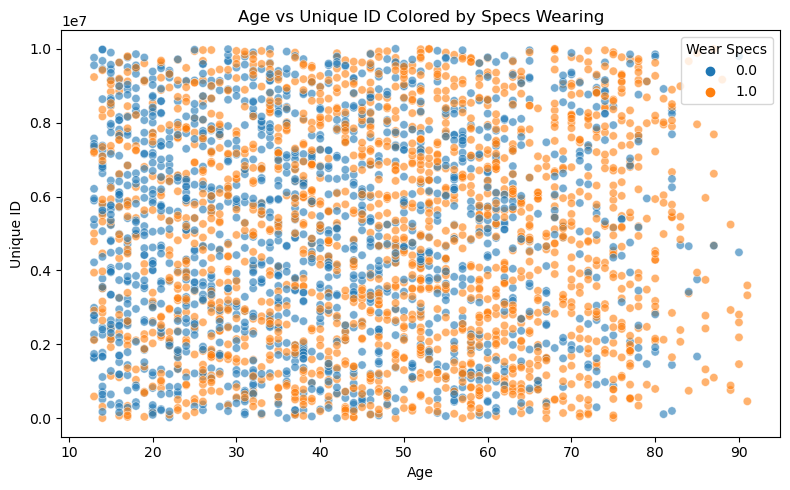

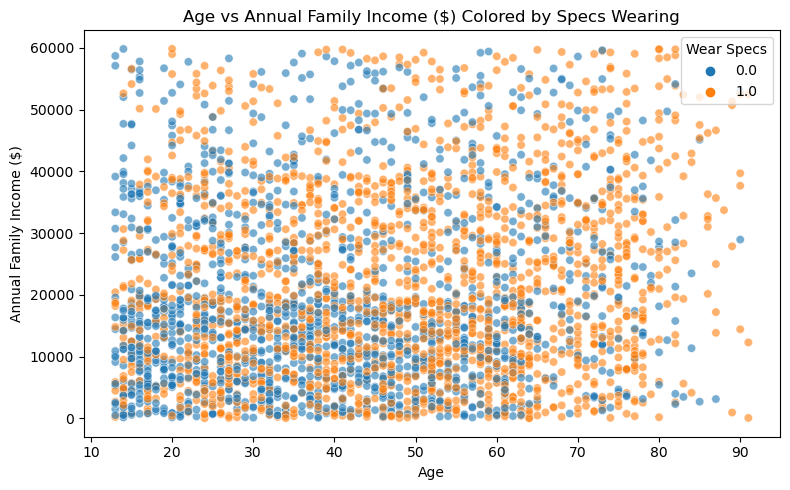

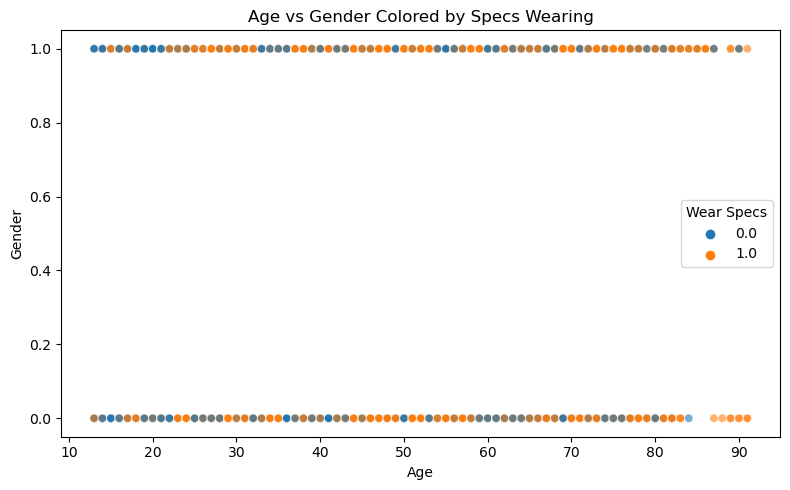

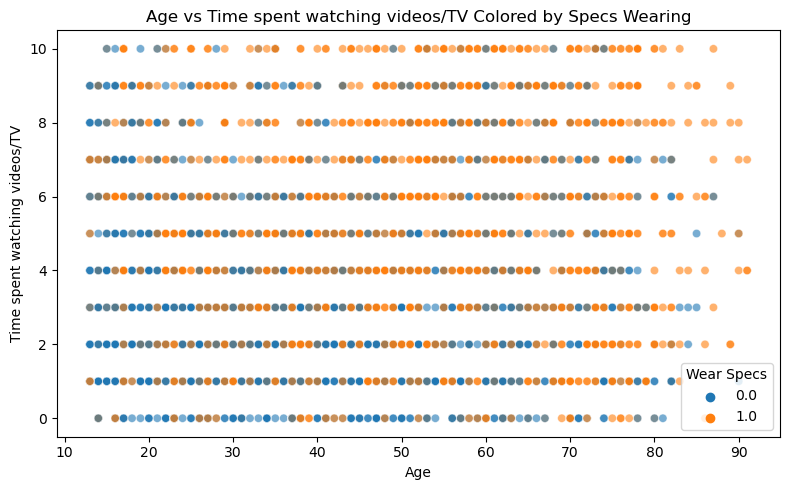

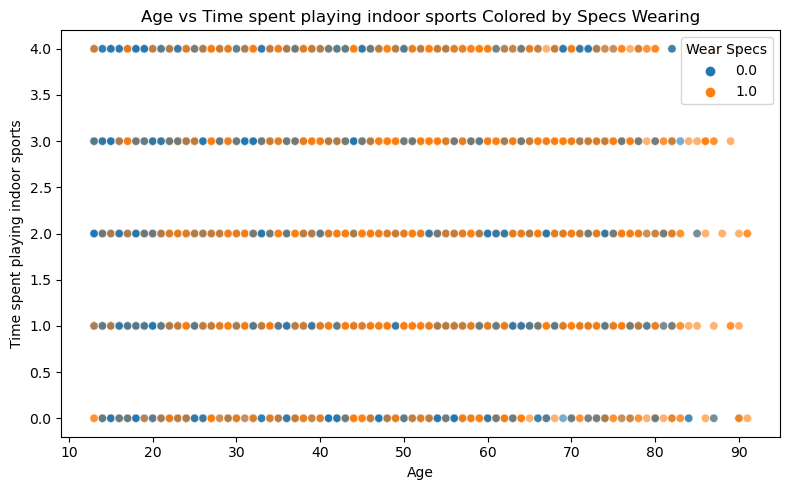

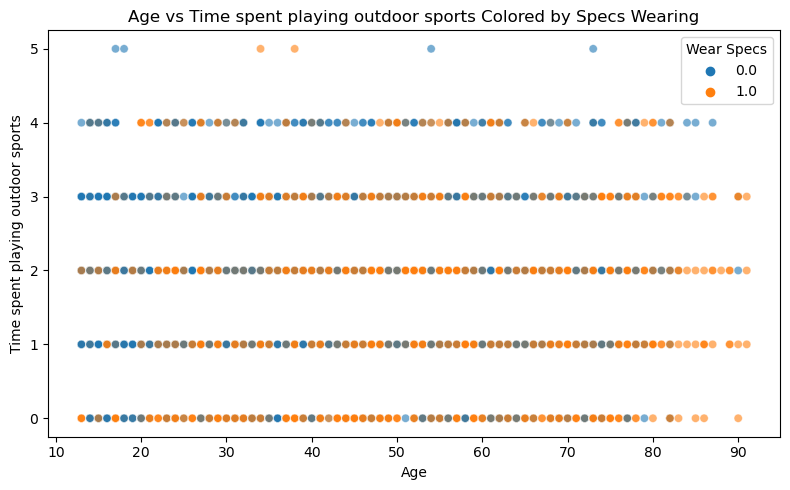

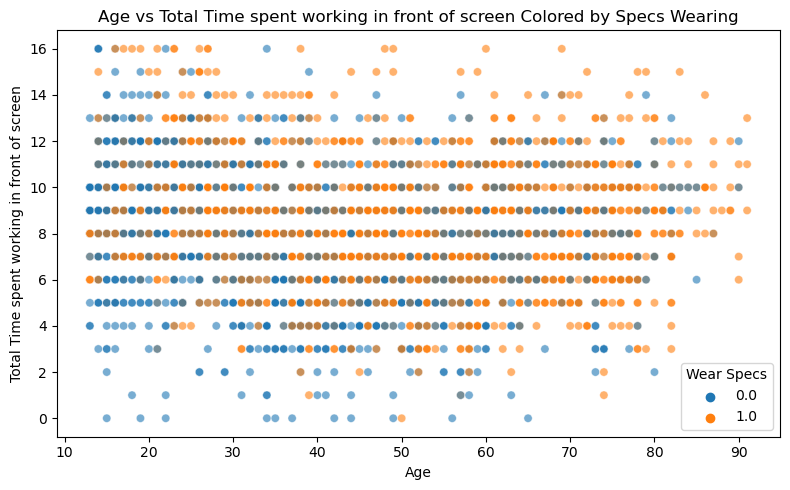

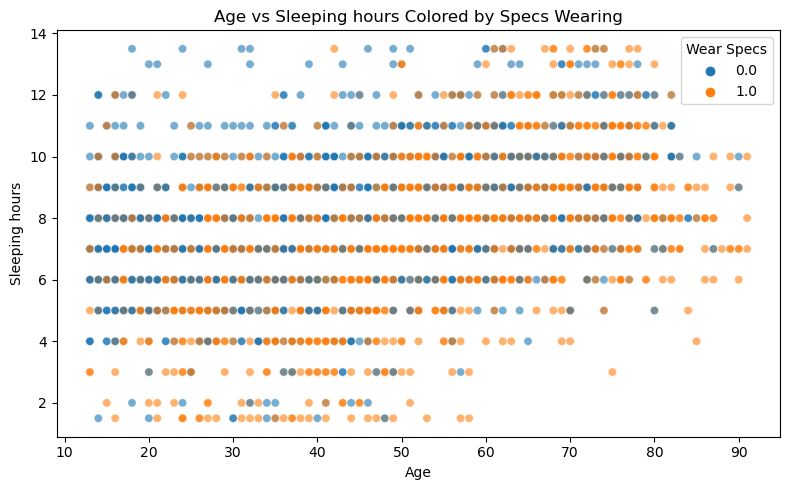

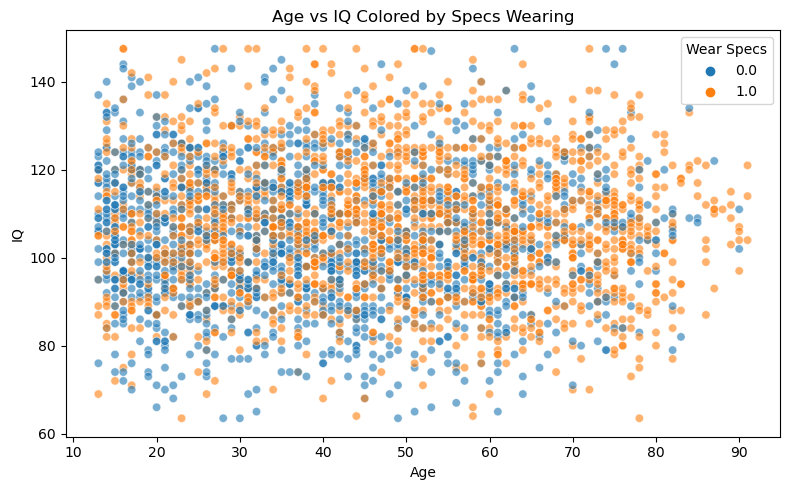

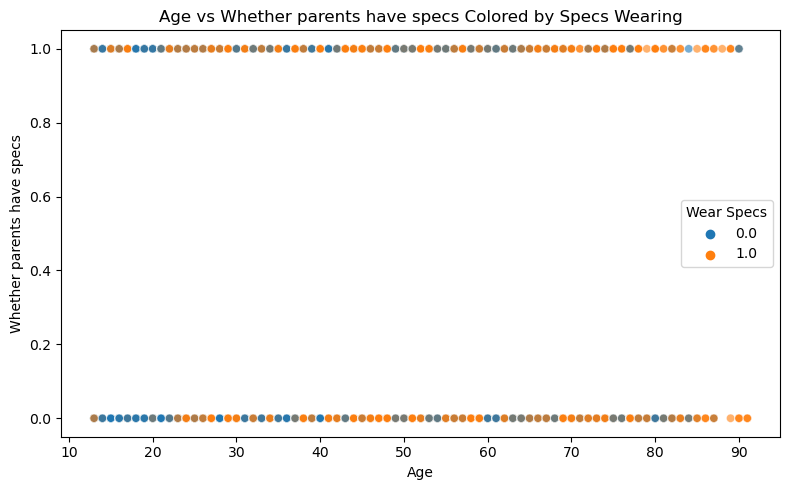

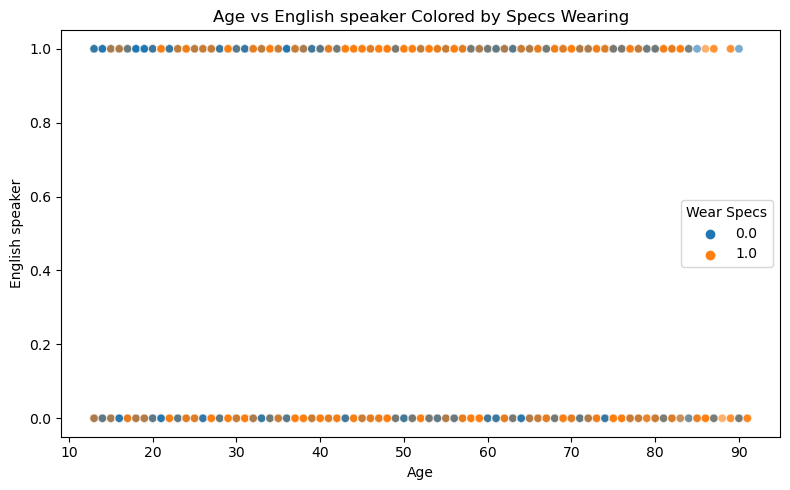

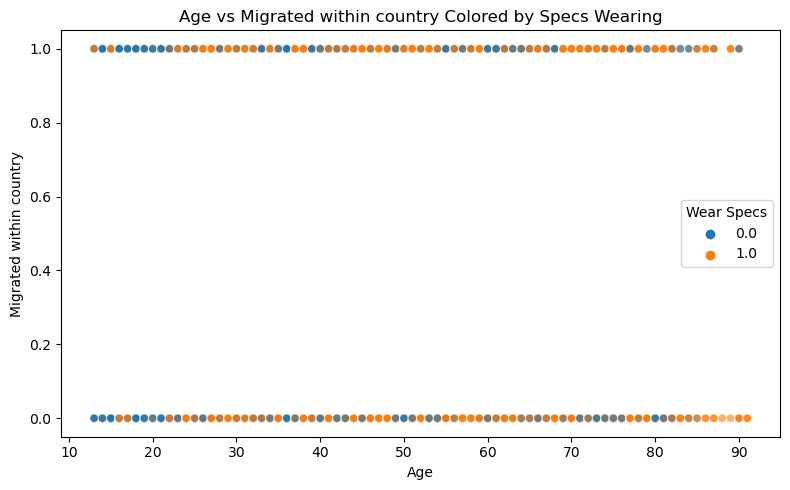

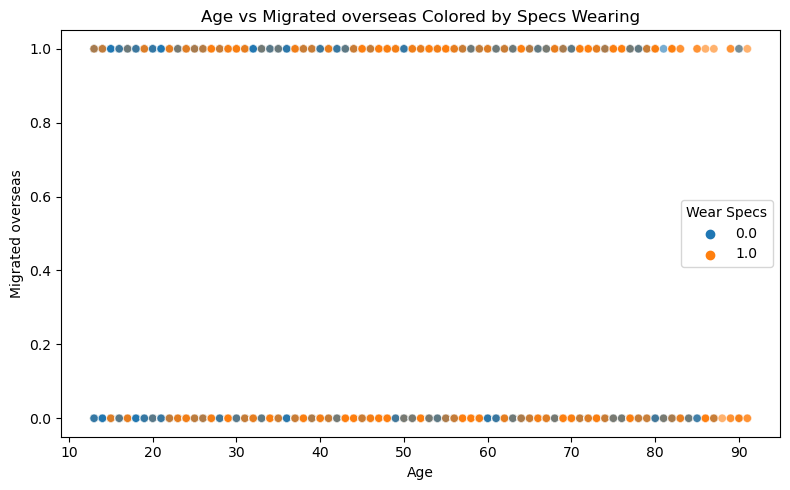

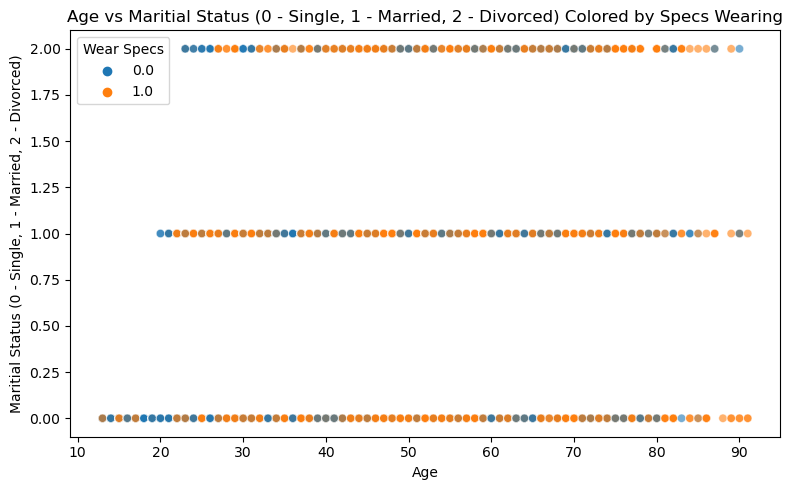

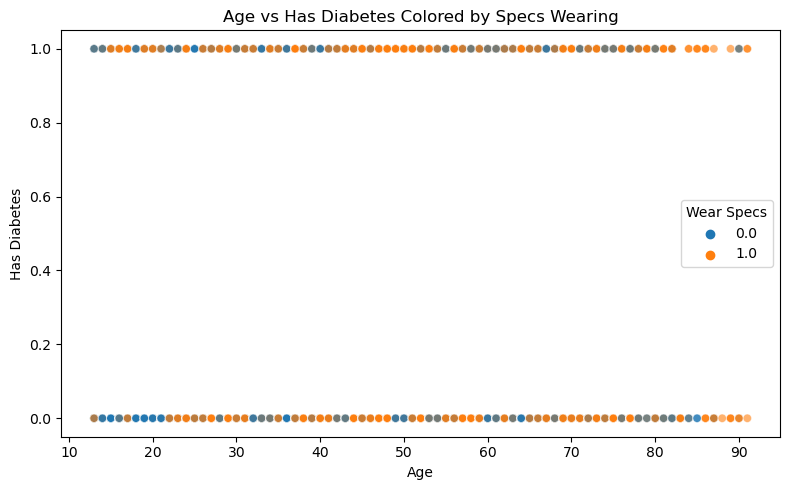

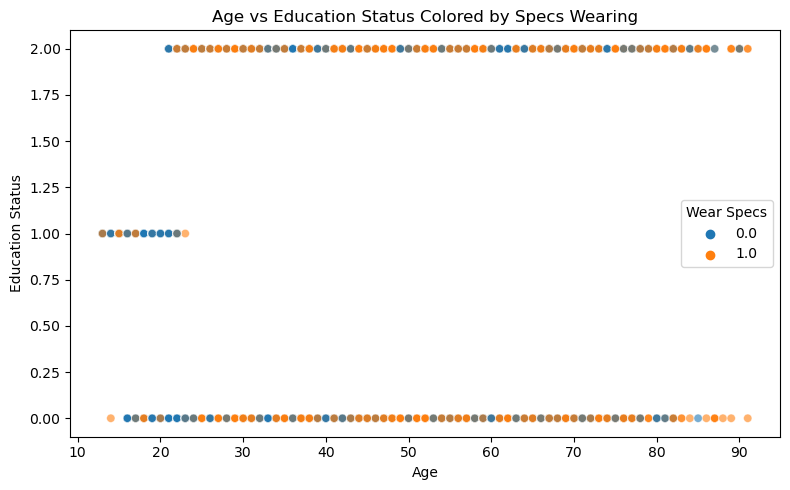

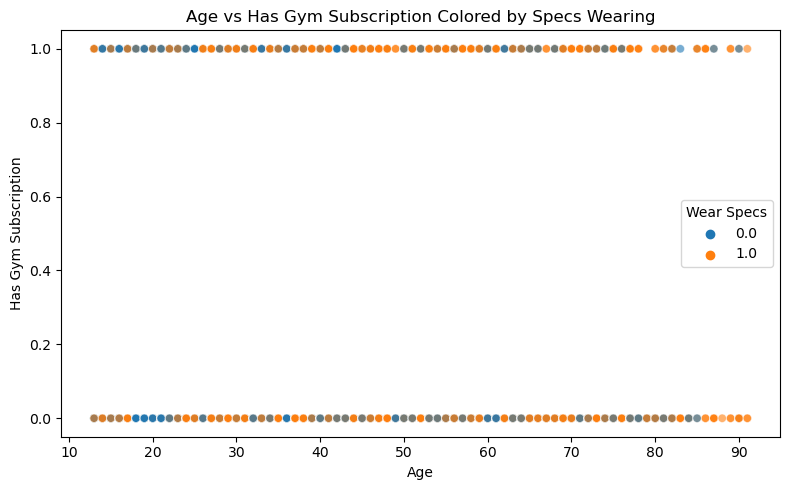

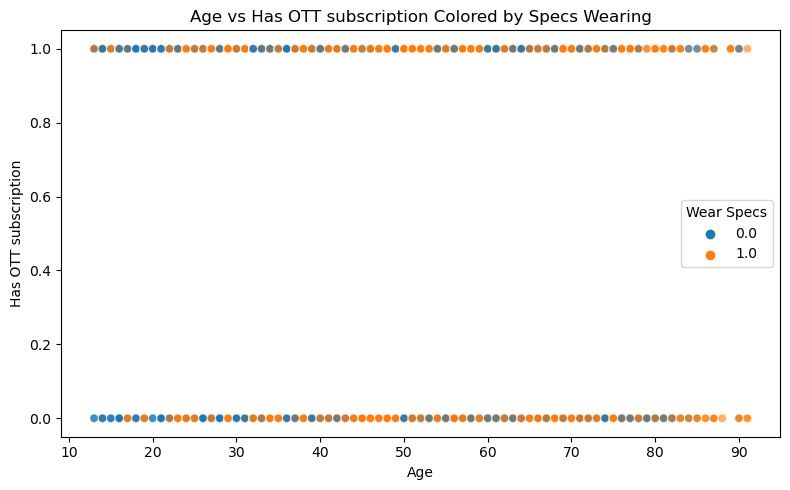

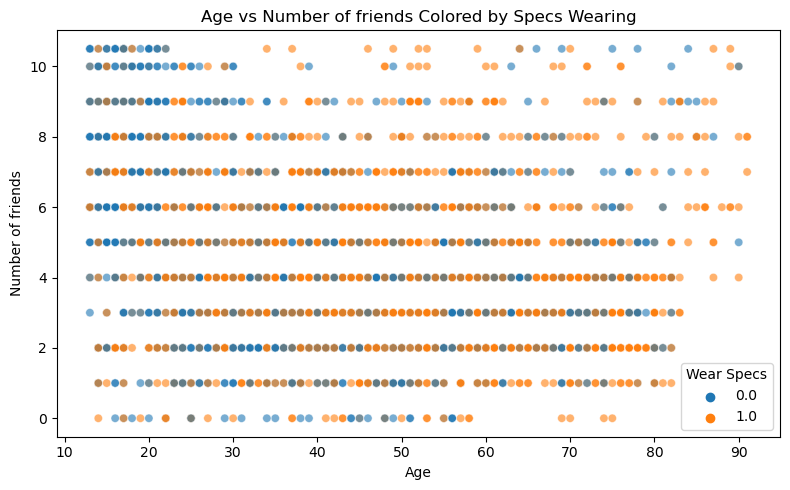

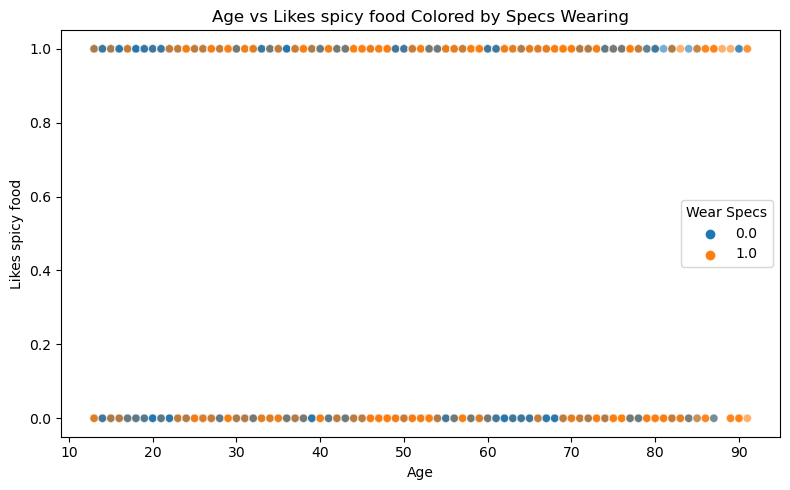

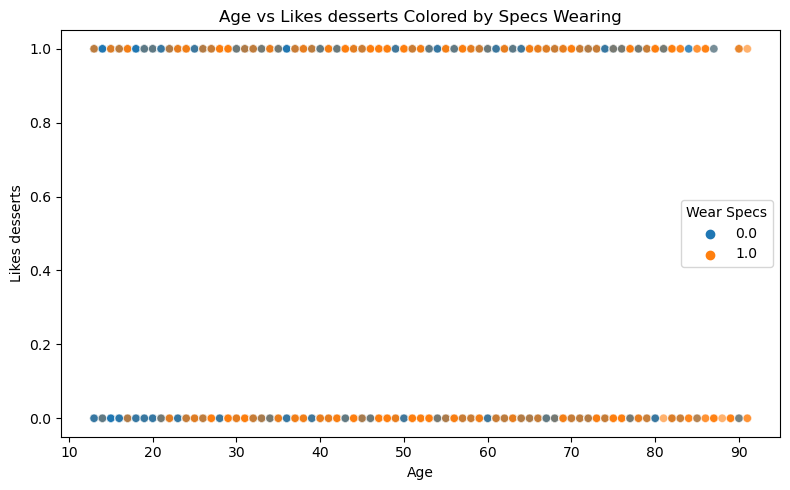

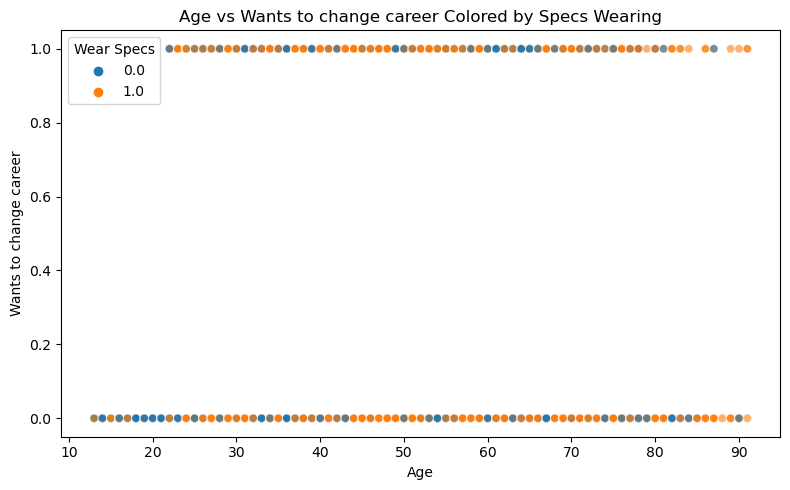

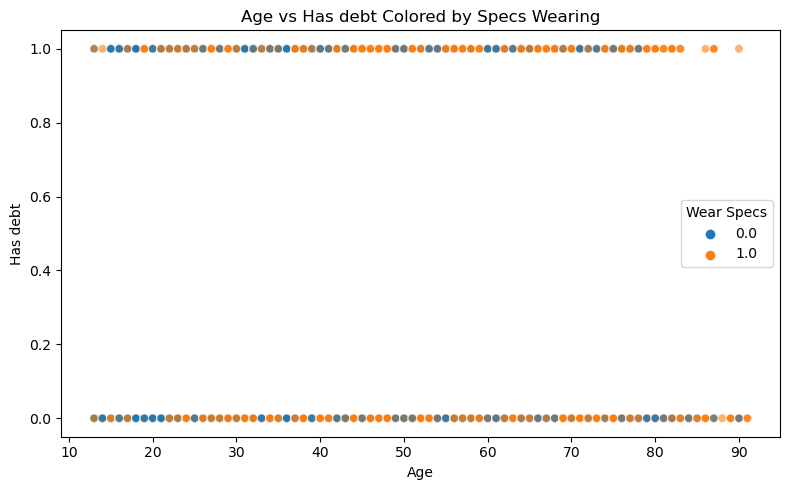

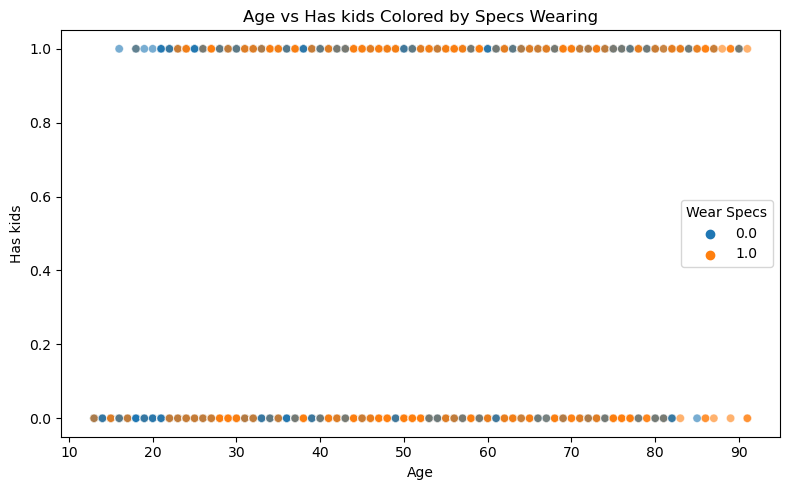

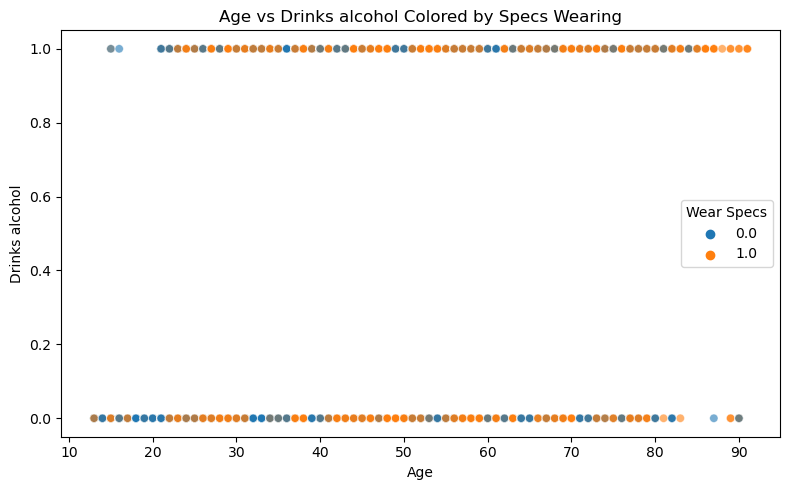

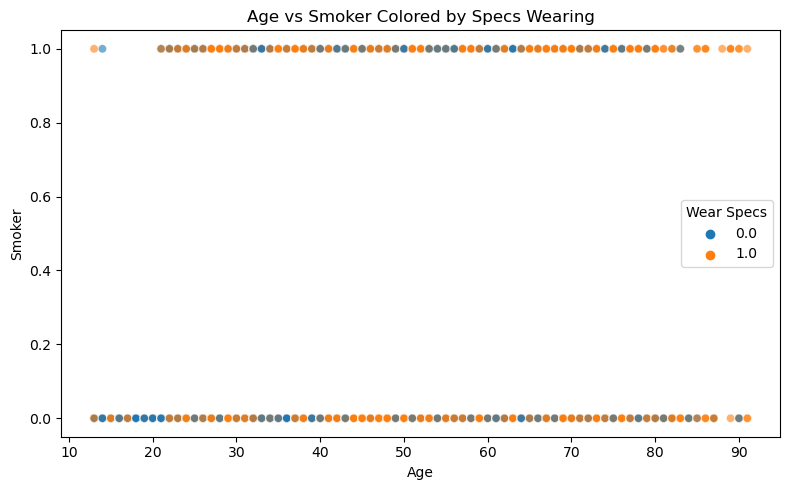

In [197]:

strong_corr_cols = correlations[correlations.abs() >= 0.1].index.tolist()

for col in strong_corr_cols:
    if col != "Age":  
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df, x='Age', y=col, hue='Wear Specs', alpha=0.6)
        plt.title(f'Age vs {col} Colored by Specs Wearing')
        plt.tight_layout()
        plt.show()


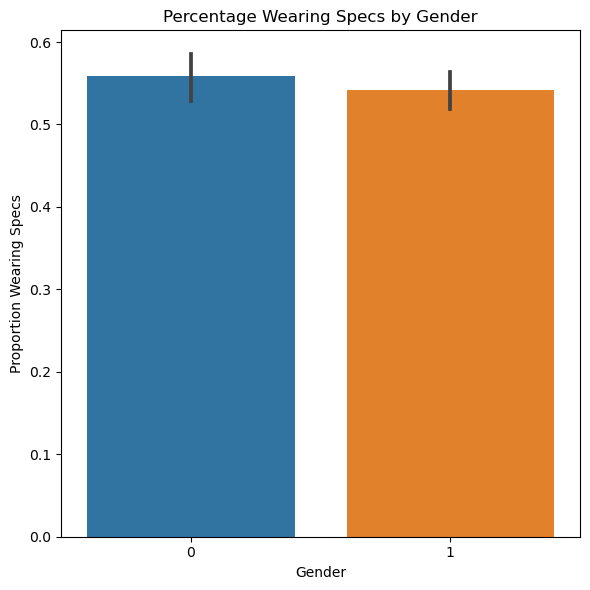

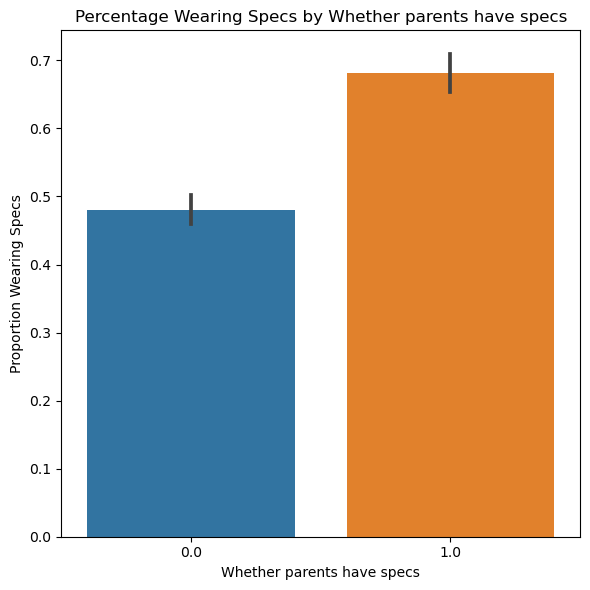

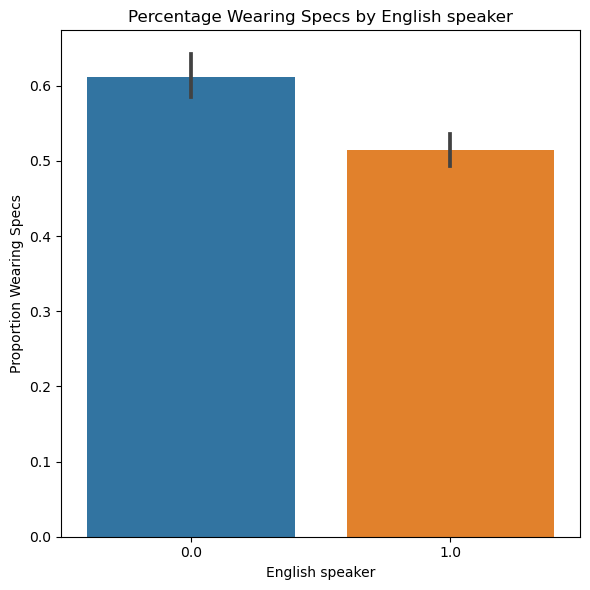

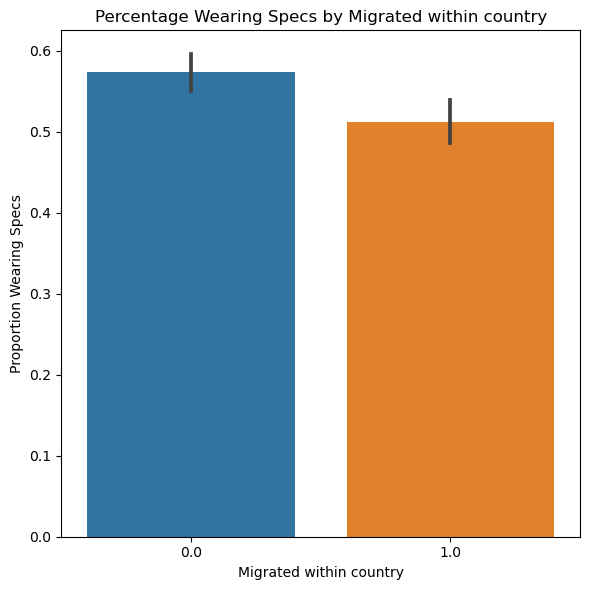

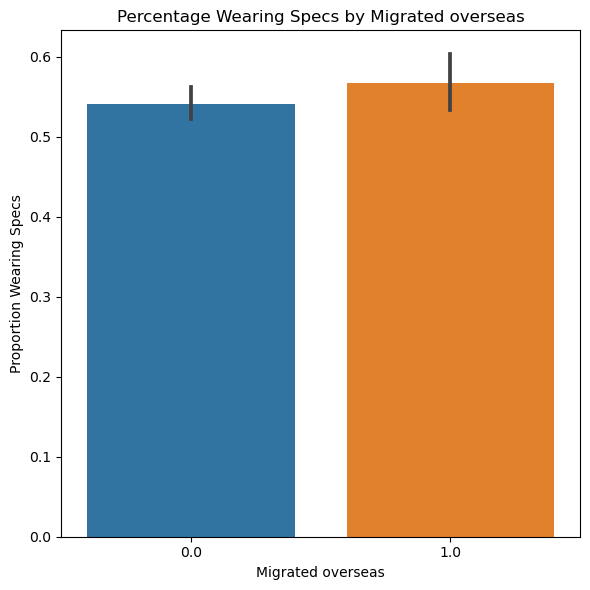

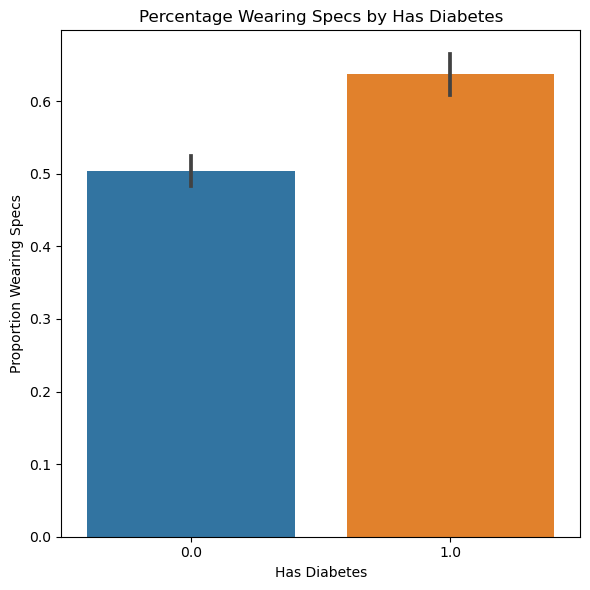

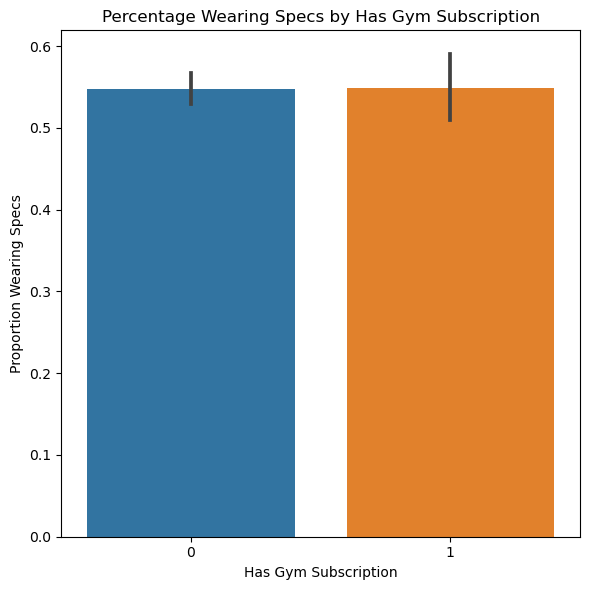

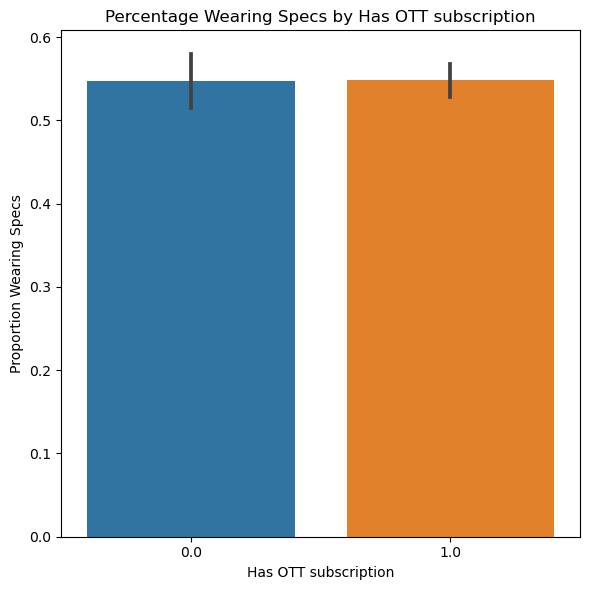

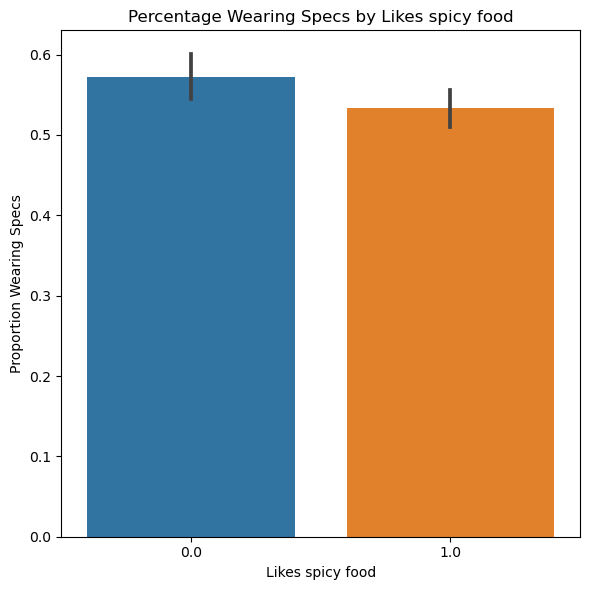

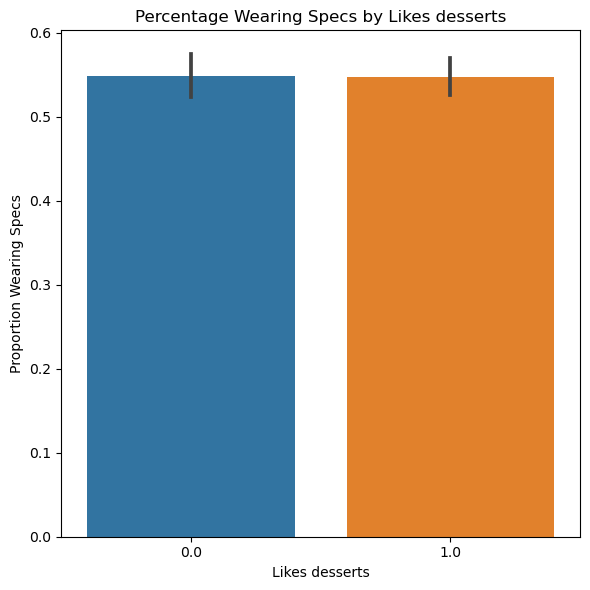

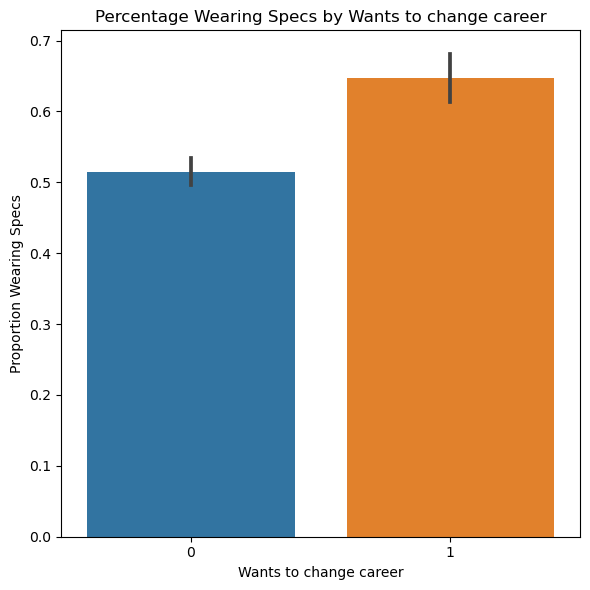

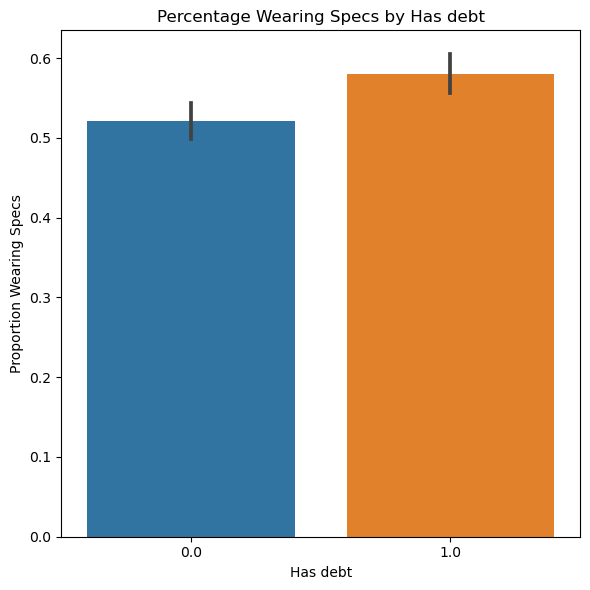

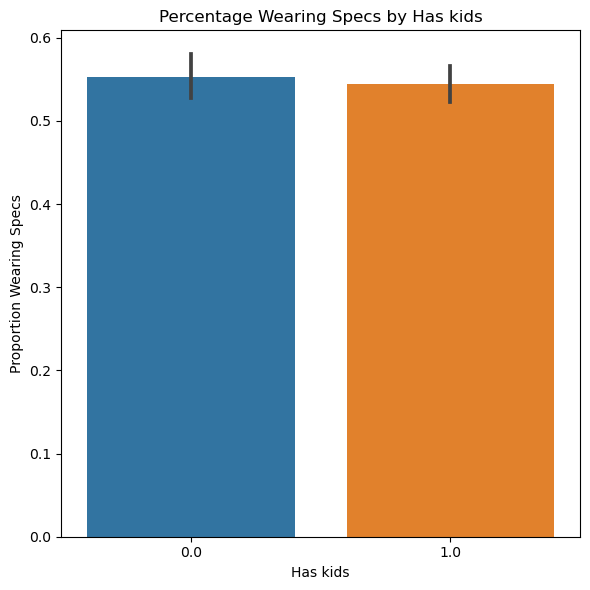

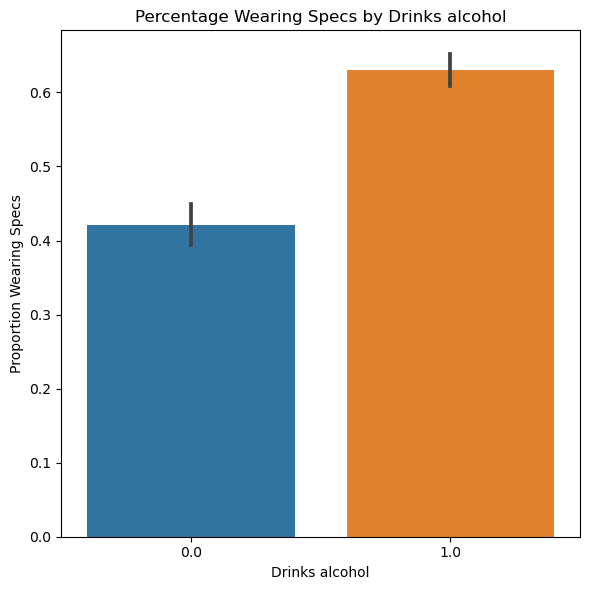

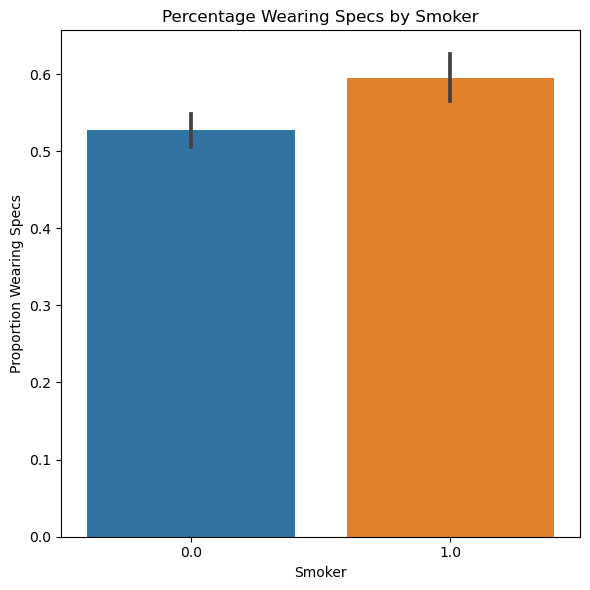

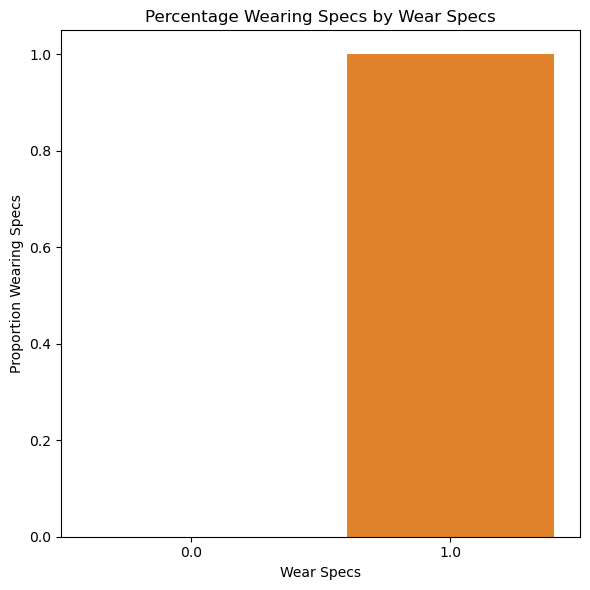

In [159]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col != "Do you wear specs?"]

for col in binary_cols:
    plt.figure(figsize=(6, 6))
    sns.barplot(data=df, x=col, y="Wear Specs")
    plt.title(f'Percentage Wearing Specs by {col}')
    plt.ylabel('Proportion Wearing Specs')
    plt.tight_layout()
    plt.show()


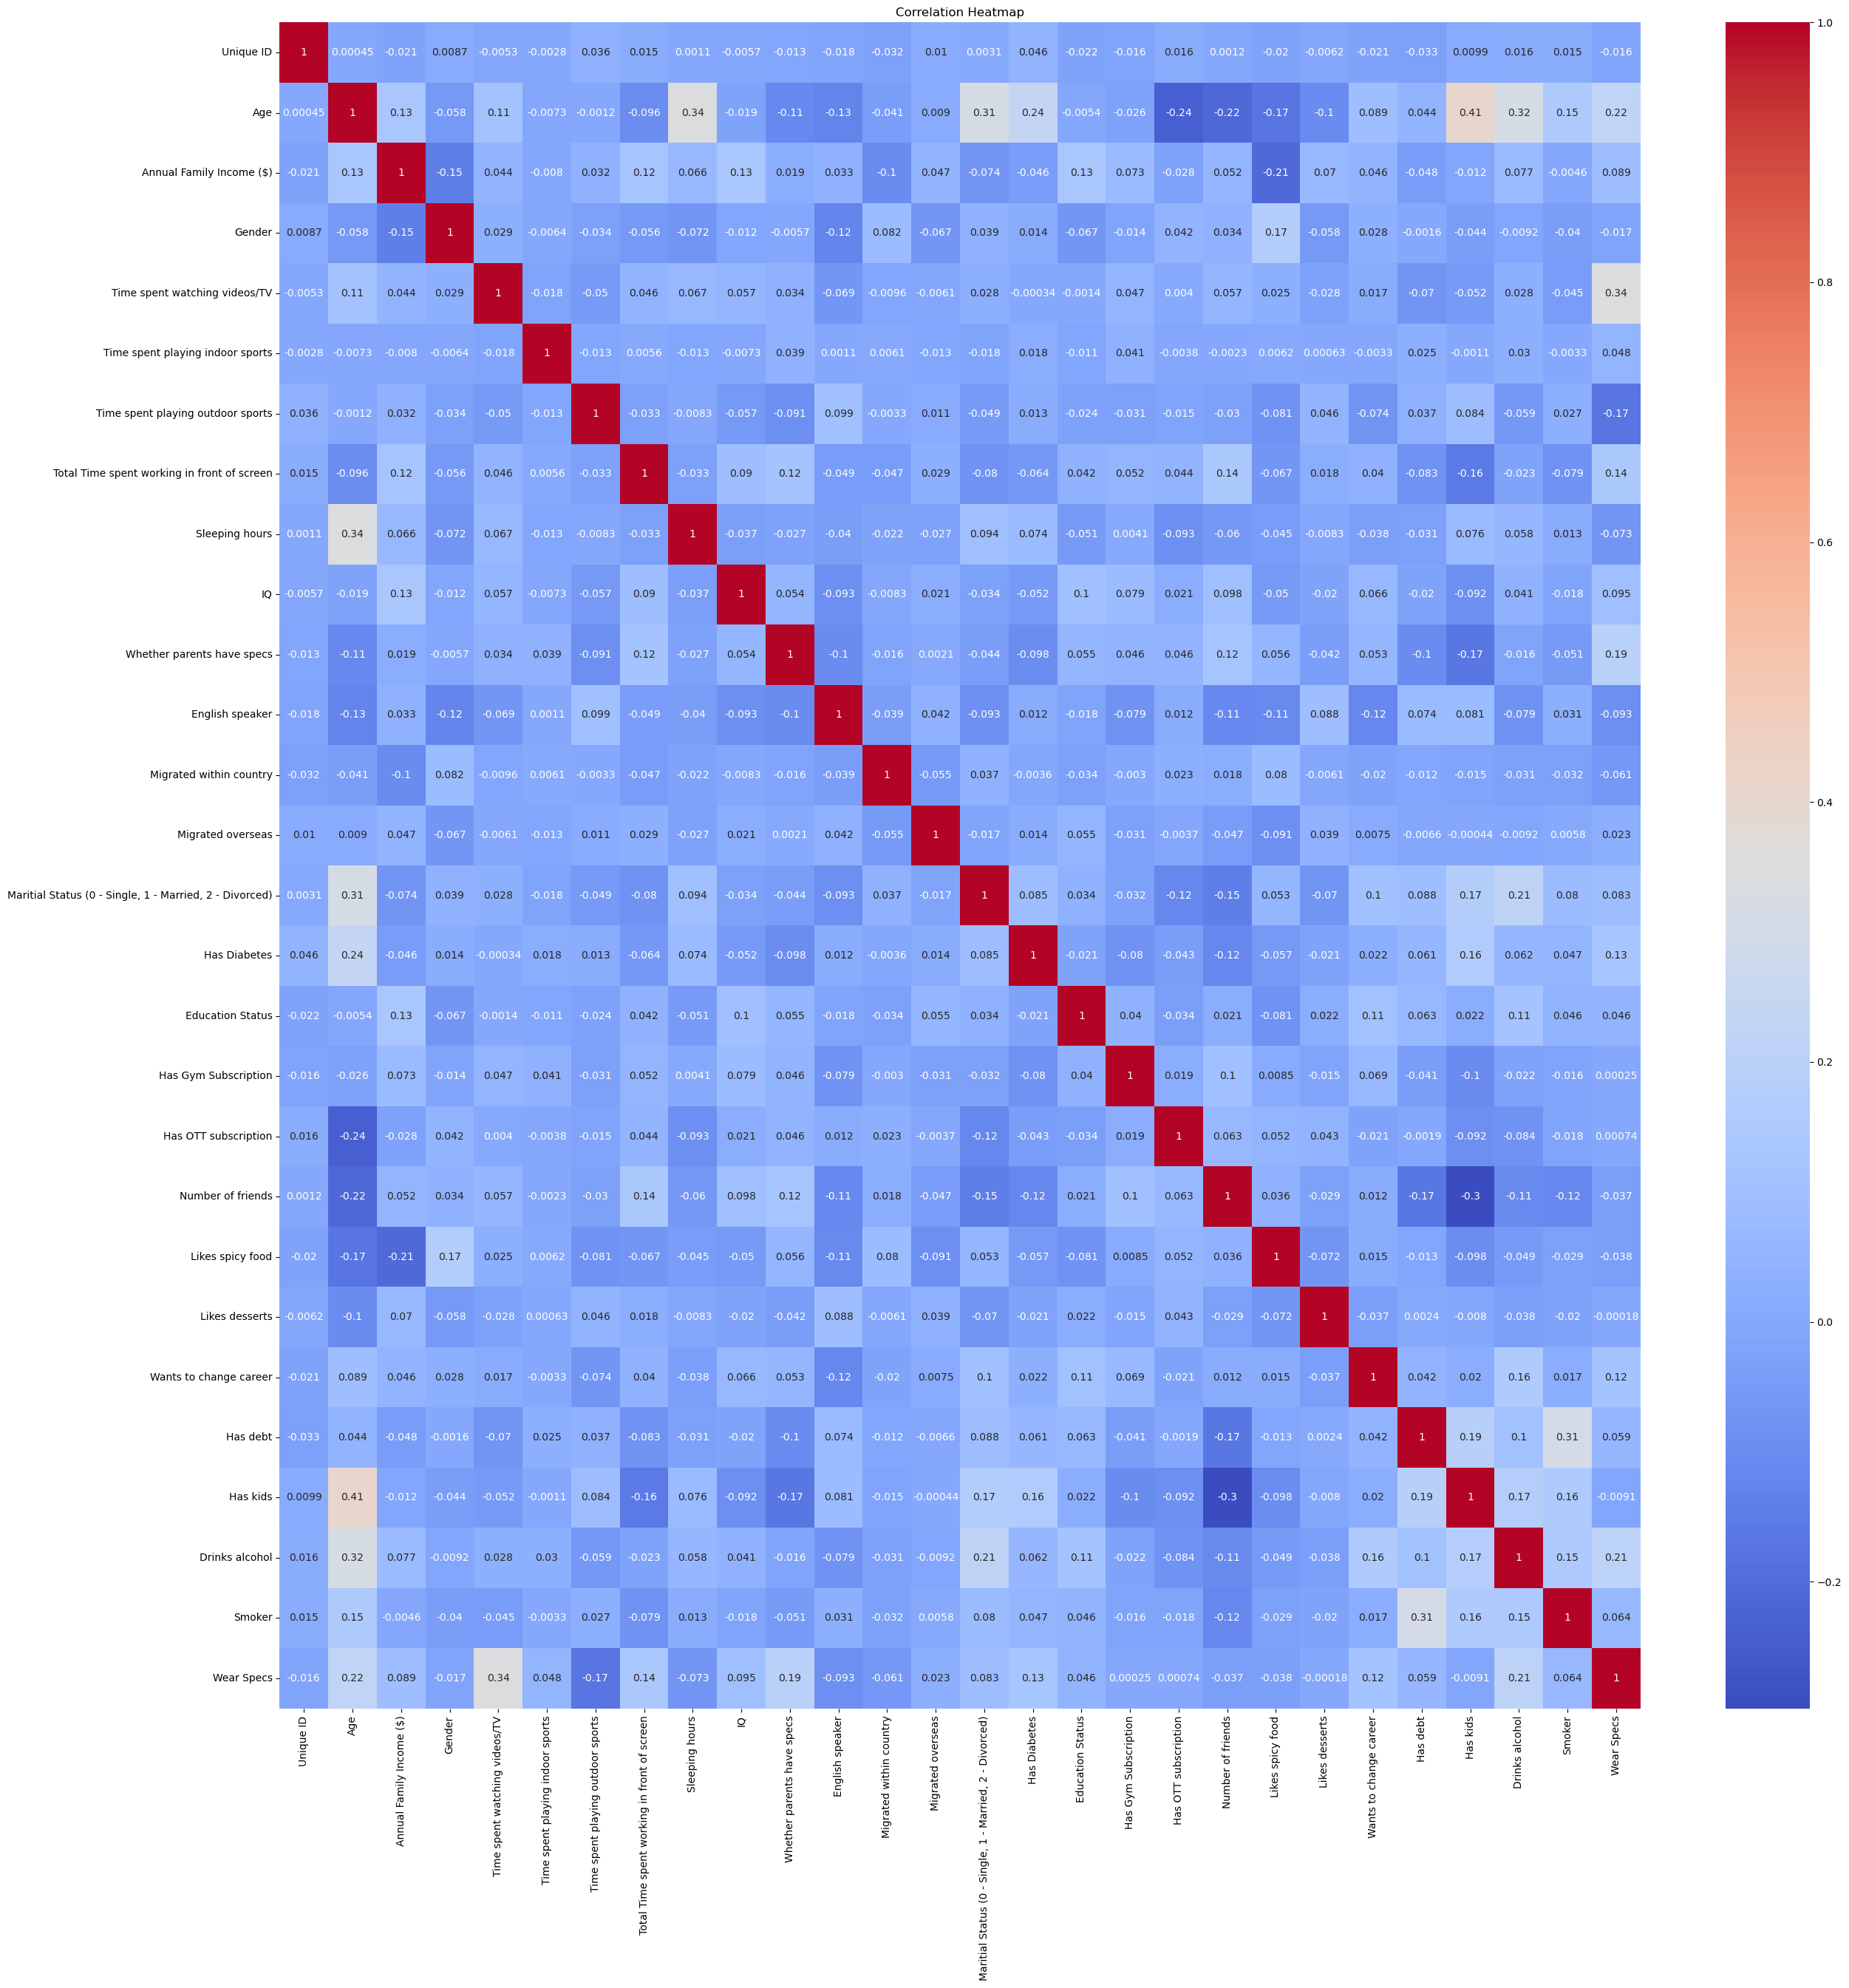

In [166]:
plt.figure(figsize=(27, 27))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [210]:
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
df1 = df.dropna(subset=["Wear Specs"])
correlations = df1[numeric_cols + ["Wear Specs"]].corr()["Wear Specs"].drop("Wear Specs")
print("Correlation with target:\n", correlations)


strong_corr_cols = correlations[correlations.abs() >= 0.1].index.tolist()
df_strong = df1[strong_corr_cols + ["Wear Specs"]]

Correlation with target:
                                                     Wear Specs  Wear Specs
Unique ID                                            -0.016292   -0.016292
Age                                                   0.221421    0.221421
Annual Family Income ($)                              0.089451    0.089451
Gender                                               -0.016555   -0.016555
Time spent watching videos/TV                         0.342571    0.342571
Time spent playing indoor sports                      0.048289    0.048289
Time spent playing outdoor sports                    -0.170925   -0.170925
Total Time spent working in front of screen           0.139592    0.139592
Sleeping hours                                       -0.073466   -0.073466
IQ                                                    0.094692    0.094692
Whether parents have specs                            0.190556    0.190556
English speaker                                      -0.092565   -0.092565

# Here we can understand which columns affect the people wearing specs the most and the least so we can understand which columns to remove

In [211]:
for col in strong_corr_cols:
    print(f"\n Checking cut-off values for: {col}")
    thresholds = sorted(df_strong[col].dropna().unique())
    for t in thresholds:
        percent_with_specs = df_strong[df_strong[col] >= t]["Wear Specs"].mean()
        if percent_with_specs >= 0.7:
            print(f"  ✅{t} and above → {percent_with_specs:.2%} wear specs")
            break



 Checking cut-off values for: Unique ID
  ✅9989245.0 and above → 71.43% wear specs

 Checking cut-off values for: Age
  ✅61.0 and above → 70.55% wear specs

 Checking cut-off values for: Annual Family Income ($)
  ✅57750.0 and above → 70.00% wear specs

 Checking cut-off values for: Gender

 Checking cut-off values for: Time spent watching videos/TV
  ✅5.0 and above → 71.33% wear specs

 Checking cut-off values for: Time spent playing indoor sports

 Checking cut-off values for: Time spent playing outdoor sports

 Checking cut-off values for: Total Time spent working in front of screen
  ✅15.0 and above → 75.00% wear specs

 Checking cut-off values for: Sleeping hours

 Checking cut-off values for: IQ
  ✅145.0 and above → 70.00% wear specs

 Checking cut-off values for: Whether parents have specs

 Checking cut-off values for: English speaker

 Checking cut-off values for: Migrated within country

 Checking cut-off values for: Migrated overseas

 Checking cut-off values for: Maritial 

In [187]:
for col in strong_corr_cols:
    print(f"\n🔎 Checking cut-off values for: {col}")
    
    thresholds = sorted(df_strong[col].dropna().unique())

    for t in thresholds:
        percent_with_specs = df_strong[df_strong[col] >= t]["Wear Specs"].mean()
        if percent_with_specs >= 0.7:
            print(f"  ✅ High: {col} >= {t} → {percent_with_specs:.2%} wear specs")
            break
    
    for t in thresholds:
        percent_with_specs = df_strong[df_strong[col] <= t]["Wear Specs"].mean()
        if percent_with_specs <= 0.3:
            print(f"  ❌ Low: {col} <= {t} → Only {percent_with_specs:.2%} wear specs")
            break



🔎 Checking cut-off values for: Unique ID
  ✅ High: Unique ID >= 9989245.0 → 71.43% wear specs

🔎 Checking cut-off values for: Age
  ✅ High: Age >= 61.0 → 70.55% wear specs

🔎 Checking cut-off values for: Annual Family Income ($)
  ✅ High: Annual Family Income ($) >= 57750.0 → 70.00% wear specs

🔎 Checking cut-off values for: Gender

🔎 Checking cut-off values for: Time spent watching videos/TV
  ✅ High: Time spent watching videos/TV >= 5.0 → 71.33% wear specs
  ❌ Low: Time spent watching videos/TV <= 0.0 → Only 27.96% wear specs

🔎 Checking cut-off values for: Time spent playing indoor sports

🔎 Checking cut-off values for: Time spent playing outdoor sports

🔎 Checking cut-off values for: Total Time spent working in front of screen
  ✅ High: Total Time spent working in front of screen >= 15.0 → 75.00% wear specs
  ❌ Low: Total Time spent working in front of screen <= 0.0 → Only 8.33% wear specs

🔎 Checking cut-off values for: Sleeping hours

🔎 Checking cut-off values for: IQ
  ✅ High: 

In [182]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col != "Wear Specs"]

for col in binary_cols:
    print(f"\n  Binary feature: {col}")
    groups = df.groupby(col)["Wear Specs"].mean()
    print(groups)



  Binary feature: Gender
Gender
0    0.558494
1    0.541582
Name: Wear Specs, dtype: float64

  Binary feature: Whether parents have specs
Whether parents have specs
0.0    0.480859
1.0    0.681818
Name: Wear Specs, dtype: float64

  Binary feature: English speaker
English speaker
0.0    0.611260
1.0    0.514517
Name: Wear Specs, dtype: float64

  Binary feature: Migrated within country
Migrated within country
0.0    0.573545
1.0    0.512030
Name: Wear Specs, dtype: float64

  Binary feature: Migrated overseas
Migrated overseas
0.0    0.541191
1.0    0.567409
Name: Wear Specs, dtype: float64

  Binary feature: Has Diabetes
Has Diabetes
0.0    0.503948
1.0    0.637301
Name: Wear Specs, dtype: float64

  Binary feature: Has Gym Subscription
Has Gym Subscription
0    0.548073
1    0.548387
Name: Wear Specs, dtype: float64

  Binary feature: Has OTT subscription
Has OTT subscription
0.0    0.547569
1.0    0.548373
Name: Wear Specs, dtype: float64

  Binary feature: Likes spicy food
Likes 

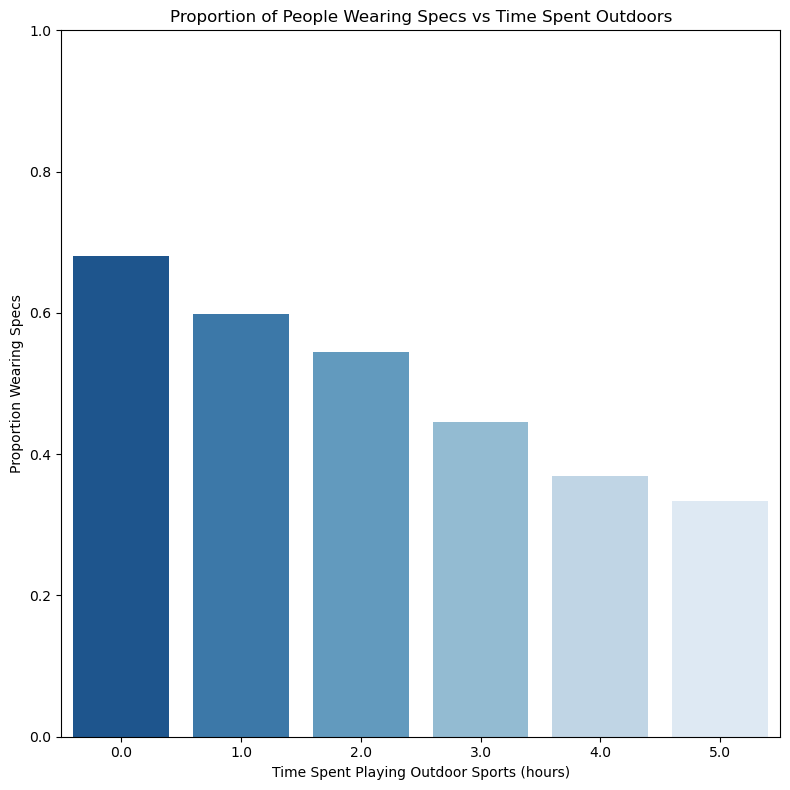

In [200]:


outdoor_stats = df.groupby('Time spent playing outdoor sports')["Wear Specs"].mean().reset_index()

outdoor_stats = outdoor_stats.sort_values('Time spent playing outdoor sports')

plt.figure(figsize=(8, 8))
sns.barplot(data=outdoor_stats, x='Time spent playing outdoor sports', y='Wear Specs', palette='Blues_r')

plt.title('Proportion of People Wearing Specs vs Time Spent Outdoors')
plt.xlabel('Time Spent Playing Outdoor Sports (hours)')
plt.ylabel('Proportion Wearing Specs')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


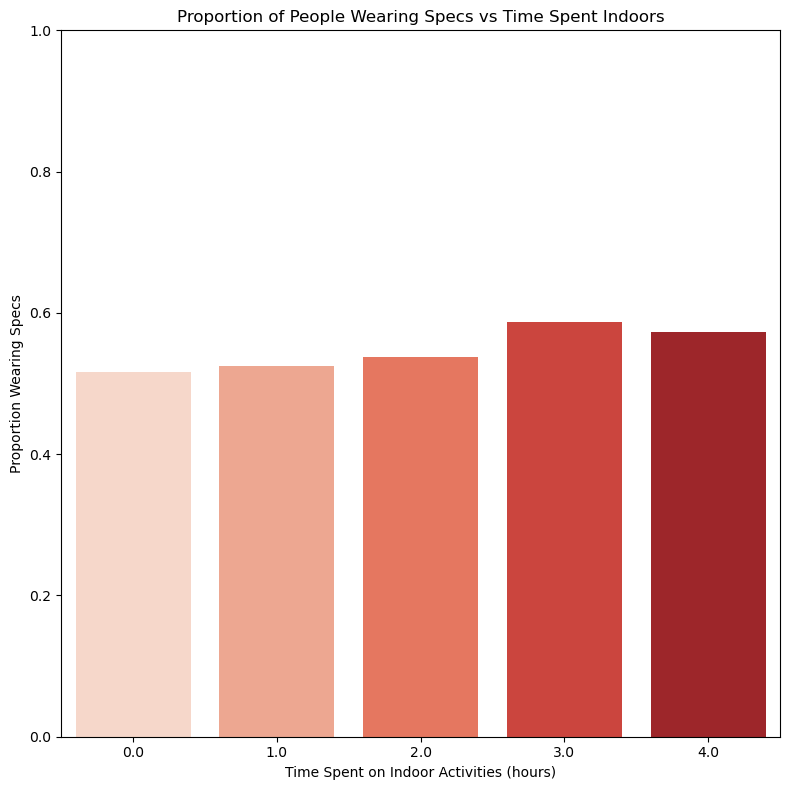

In [204]:
indoor_stats = df.groupby('Time spent playing indoor sports')["Wear Specs"].mean().reset_index()

indoor_stats = indoor_stats.sort_values('Time spent playing indoor sports')

plt.figure(figsize=(8, 8))
sns.barplot(data=indoor_stats, x='Time spent playing indoor sports', y='Wear Specs', palette='Reds')

plt.title('Proportion of People Wearing Specs vs Time Spent Indoors')
plt.xlabel('Time Spent on Indoor Activities (hours)')
plt.ylabel('Proportion Wearing Specs')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


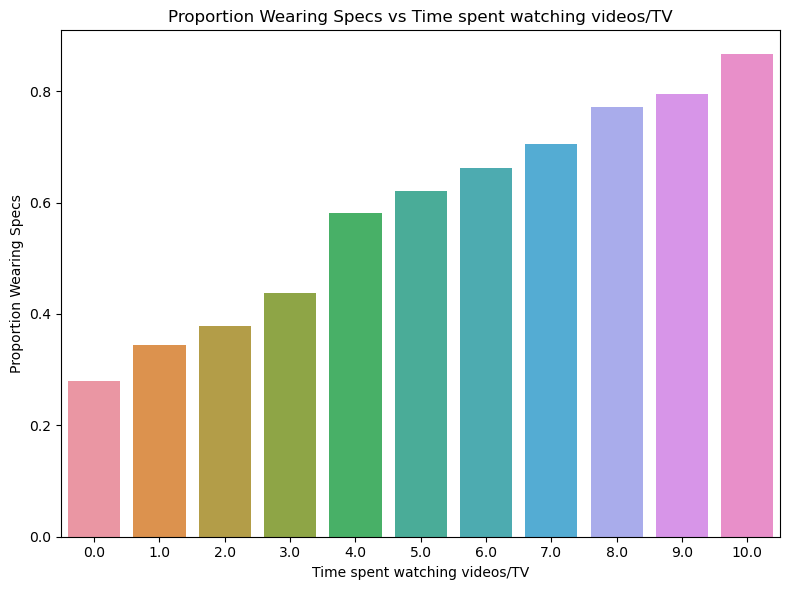

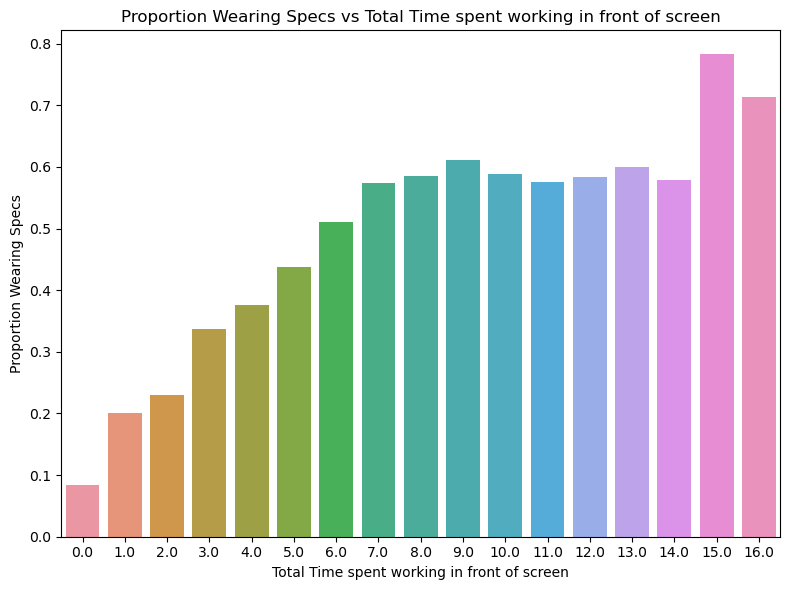

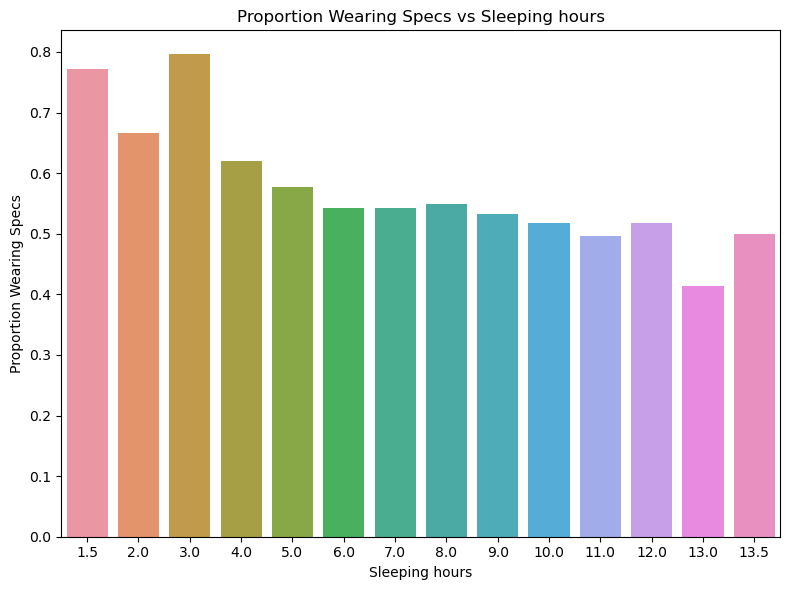

In [216]:
features = [
    'Time spent watching videos/TV',
    'Total Time spent working in front of screen',
    'Sleeping hours'
]

for feature in features:
    stats = df.groupby(feature)["Wear Specs"].mean().reset_index()
    stats = stats.sort_values(feature)

    plt.figure(figsize=(8, 6))
    sns.barplot(data=stats, x=feature, y='Wear Specs',)

    plt.title(f'Proportion Wearing Specs vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion Wearing Specs')
    plt.tight_layout()
    plt.show()
